#Kaggle link

https://www.kaggle.com/c/system-hack-highly-imbalanced-data

### Table of contents:
#### 1. Importing required libraries
#### 2. Reading raw csv files
#### 3. Exploratory data analysis & data treatment
#### 4. Feature engineering
#### 5. Spiliting data set into train and test
#### 6. Standardizing
#### 7. Treating Imbalance 
#### 8. Model building
#### 9. Prediction on test data
#### 10. Submission


### 1. Importing Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') #to ignore unnecessary warnings

import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt
import seaborn as sns



#data preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

#cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# evaluation metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, classification_report


### 2. Reading raw csv files

In [2]:
#raw train file

train_raw = pd.read_csv('Train.csv')
train_raw.head(10)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_49332,16-JUL-98,0,4,4,6,5,6,4,1,6,1,316,1.0,98,62,34,1
1,CR_161759,08-JUN-13,3,4,4,6,5,9,8,1,6,1,316,1.0,54,29,34,1
2,CR_25291,26-NOV-95,0,4,4,6,5,1,0,10,6,1,316,1.0,72,29,34,1
3,CR_71855,25-JUL-00,1,47,48,7,3,15,10,0,5,1,174,0.0,103,130,34,1
4,CR_105783,15-NOV-05,0,4,4,6,5,3,5,1,6,1,174,0.0,112,29,23,1
5,CR_25975,18-OCT-95,0,4,4,6,5,2,7,0,5,1,249,1.0,54,29,34,1
6,CR_189797,30-OCT-17,0,37,37,0,0,8,3,1,6,1,249,1.0,111,29,34,1
7,CR_165541,10-MAR-13,0,37,37,0,0,3,5,0,5,1,316,1.0,72,142,34,1
8,CR_68092,21-AUG-00,0,21,23,4,1,2,7,0,5,1,249,1.0,72,29,34,1
9,CR_72703,12-SEP-01,0,3,2,3,5,1,0,1,6,1,249,1.0,10,87,34,1


In [3]:
train_raw.loc[train_raw['MULTIPLE_OFFENSE'] == 0]

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
11,CR_54809,04-OCT-98,0,36,34,2,1,1,0,0,5,2,174,1.0,92,93,39,0
65,CR_40576,24-FEB-96,0,49,49,6,5,7,1,2,6,2,179,1.0,103,93,39,0
86,CR_133452,21-DEC-08,1,39,39,6,5,12,16,1,6,2,179,2.0,103,93,34,0
87,CR_86408,03-FEB-02,0,28,28,3,5,5,6,3,6,3,200,2.0,98,62,34,0
128,CR_79677,26-DEC-01,1,36,34,2,1,15,10,0,5,2,192,0.0,92,80,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18837,CR_135980,25-NOV-09,0,4,4,6,5,3,5,3,2,2,263,1.0,72,107,34,0
19019,CR_139873,16-DEC-09,1,36,34,2,1,15,10,0,5,1,290,1.0,103,53,36,0
19034,CR_133763,04-AUG-08,1,43,43,9,0,16,12,0,5,2,174,1.0,109,93,9,0
19048,CR_62266,09-MAR-99,0,36,34,2,1,1,0,0,5,2,174,1.0,92,130,9,0


In [4]:
# raw test file

test_raw = pd.read_csv('Test.csv')
test_raw.head(10)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_73622,08-MAY-01,0,4,4,6,5,1,0,1,6,1,249,1.0,72,29,34
1,CR_195925,28-NOV-18,0,33,32,2,1,7,1,0,5,1,249,1.0,116,29,34
2,CR_59971,15-NOV-99,0,21,23,4,1,7,1,0,5,2,174,1.0,103,62,40
3,CR_59113,25-MAR-99,0,9,10,7,3,6,4,1,5,1,174,0.0,54,93,43
4,CR_159988,16-JAN-12,1,44,44,1,3,16,12,1,5,1,174,1.0,103,29,34
5,CR_8699,08-MAY-92,0,36,34,2,1,1,0,0,5,1,174,0.0,18,93,46
6,CR_7110,16-MAY-92,0,26,27,9,0,3,5,6,2,1,174,1.0,72,142,34
7,CR_99086,17-FEB-04,0,9,10,7,3,3,5,1,5,1,249,1.0,34,130,34
8,CR_55823,12-MAY-98,0,45,45,10,3,5,6,0,5,1,174,0.0,98,29,43
9,CR_17218,14-NOV-93,0,40,40,2,1,1,0,5,6,1,316,1.0,72,142,34


### 3. Exploratory Data Analysis & Data Treatment

In [5]:
#Shape of the dataframe

print('No. of rows in train_raw = ', train_raw.shape[0],'\n','No. of columns in train_raw = ', train_raw.shape[1] )

No. of rows in train_raw =  19084 
 No. of columns in train_raw =  18


In [6]:
print('No. of rows in test_raw = ', test_raw.shape[0],'\n','No. of columns in test_raw = ', test_raw.shape[1] )

No. of rows in test_raw =  4772 
 No. of columns in test_raw =  17


In [7]:
# General information - train_raw

train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       19084 non-null  object 
 1   DATE              19084 non-null  object 
 2   X_1               19084 non-null  int64  
 3   X_2               19084 non-null  int64  
 4   X_3               19084 non-null  int64  
 5   X_4               19084 non-null  int64  
 6   X_5               19084 non-null  int64  
 7   X_6               19084 non-null  int64  
 8   X_7               19084 non-null  int64  
 9   X_8               19084 non-null  int64  
 10  X_9               19084 non-null  int64  
 11  X_10              19084 non-null  int64  
 12  X_11              19084 non-null  int64  
 13  X_12              18937 non-null  float64
 14  X_13              19084 non-null  int64  
 15  X_14              19084 non-null  int64  
 16  X_15              19084 non-null  int64 

In [8]:
# Unique value count for train_raw 

for i in train_raw.columns:
    print(train_raw[i].value_counts(dropna=False))

CR_80828     1
CR_130647    1
CR_11280     1
CR_140824    1
CR_145971    1
            ..
CR_134807    1
CR_59703     1
CR_26236     1
CR_71986     1
CR_78000     1
Name: INCIDENT_ID, Length: 19084, dtype: int64
12-SEP-01    19
13-SEP-01    18
15-SEP-01    13
17-SEP-01    11
14-AUG-05    10
             ..
31-JUL-01     1
20-JAN-91     1
10-OCT-98     1
29-MAR-11     1
11-SEP-00     1
Name: DATE, Length: 8530, dtype: int64
0    15207
1     2844
7      679
5      212
3      105
4       23
2        9
6        5
Name: X_1, dtype: int64
4     3224
36    1793
33    1739
24    1088
21    1014
37     779
49     736
45     694
3      601
22     564
47     506
16     502
9      480
39     414
25     414
5      362
6      346
44     334
40     311
19     288
26     274
30     211
42     195
17     187
18     164
35     150
46     139
38     132
7      131
50     126
15     111
23      92
2       91
51      88
8       87
29      84
11      82
41      72
14      66
28      62
43      55
32      50

In [9]:
train_raw['X_1'].unique()

array([0, 3, 1, 5, 7, 2, 6, 4], dtype=int64)

### Observations:

#### 1. Detail explanation is not given for variables X_1 to X_15 ( Original nature of these variables is hidden to ensure confidentiality)

#### 2. From the above value count, it is observed that variables like X_1,X_4,X_5,X_9,etc. could be categorical variables encoded as integers
#### 3. There are total 19084 number of data points available
#### 4. The column X_12 has some missing values

In [10]:
# Converting Date from object type to pd.datetime

train_raw['DATE'] = pd.to_datetime(train_raw['DATE'])
test_raw['DATE'] = pd.to_datetime(test_raw['DATE'])

print('Lower Date: ' ,train_raw['DATE'].min(), '\n', 'Higher date : ', train_raw['DATE'].max())

Lower Date:  1991-01-01 00:00:00 
 Higher date :  2018-12-31 00:00:00


In [11]:
#General information: test_raw

test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   INCIDENT_ID  4772 non-null   object        
 1   DATE         4772 non-null   datetime64[ns]
 2   X_1          4772 non-null   int64         
 3   X_2          4772 non-null   int64         
 4   X_3          4772 non-null   int64         
 5   X_4          4772 non-null   int64         
 6   X_5          4772 non-null   int64         
 7   X_6          4772 non-null   int64         
 8   X_7          4772 non-null   int64         
 9   X_8          4772 non-null   int64         
 10  X_9          4772 non-null   int64         
 11  X_10         4772 non-null   int64         
 12  X_11         4772 non-null   int64         
 13  X_12         4737 non-null   float64       
 14  X_13         4772 non-null   int64         
 15  X_14         4772 non-null   int64         
 16  X_15  

In [12]:
# Unique value count for test_raw 

for i in test_raw.columns:
    print(test_raw[i].value_counts(dropna=False))

CR_177616    1
CR_153748    1
CR_138155    1
CR_117471    1
CR_62539     1
            ..
CR_48435     1
CR_8789      1
CR_38855     1
CR_34838     1
CR_118892    1
Name: INCIDENT_ID, Length: 4772, dtype: int64
2001-09-17    6
2001-09-11    5
2001-09-26    5
2014-08-07    5
2006-07-19    4
             ..
2016-10-17    1
2004-03-27    1
1999-09-02    1
1996-03-30    1
2006-03-22    1
Name: DATE, Length: 3742, dtype: int64
0    3829
1     653
7     197
5      58
3      31
4       3
2       1
Name: X_1, dtype: int64
4     805
36    439
33    435
24    256
21    240
45    214
49    191
37    183
3     177
47    135
16    129
9     113
22    108
39     99
44     94
6      88
25     85
26     82
19     82
5      75
40     74
30     55
17     51
18     46
42     43
46     42
35     36
7      35
50     34
38     32
23     30
11     25
2      25
15     25
41     21
32     19
14     18
8      17
28     16
51     15
29     15
43     14
20     11
34     10
48      9
27      7
31      7
1       4


### Observations:

#### 1. Detail explanation is not given for variables X_1 to X_15 ( Original nature of these variables is hidden to ensure confidentiality)

#### 2. From the above value count, it is observed that variables like X_1,X_4,X_5,X_9,etc. could be categorical variables encoded as integers
#### 3. There are total 4772 number of data points available
#### 4. The column X_12 has some missing values

#### What is imbalanced data ?
https://www.youtube.com/watch?v=FjGvdvK77vo

In [13]:
#Checking Data Imbalance // Uniques value counts in 'MULTIPLE_OFFENSE' // 

uv = pd.DataFrame(train_raw['MULTIPLE_OFFENSE'].value_counts(dropna =False))
uv  # 1 - Hack
    # 0 - Not a Hack

,MULTIPLE_OFFENSE
1,18223
0,861


In [14]:
# Function to print height of barcharts on the bars

def barh(ax):
    
    for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x()+ p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height() + 500 #y-position
        ax.annotate(round(val,2),(x,y))


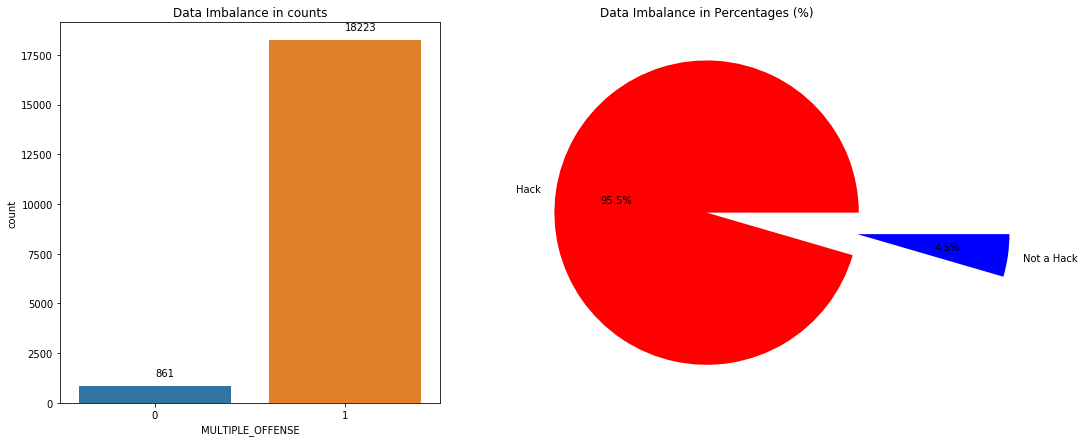

In [15]:
# Ploting imbalance in dataframe 

plt.figure(figsize = (15,7))

cols = ['r','b']

plt.subplot(1,2,1)
ax0 = sns.countplot(x = 'MULTIPLE_OFFENSE',data = train_raw)
barh(ax0)
plt.title('Data Imbalance in counts')

plt.subplot(1,2,2)
labels = ['Hack','Not a Hack' ]

plt.pie(uv['MULTIPLE_OFFENSE'], labels=labels, autopct='%1.1f%%',explode = (0,1),colors = cols)
plt.title('Data Imbalance in Percentages (%)')


plt.show()

# 1 - Hack
    # 0 - Not a Hack

#### Dataframe is highly imbalanced 

### 3.1. Searching for outliers


In [16]:
# All columns of train_raw dataframe

col = train_raw.columns
col 

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

In [17]:
# Numerical columns

num_col = [i for i in col if i not in ['INCIDENT_ID', 'DATE','MULTIPLE_OFFENSE']]


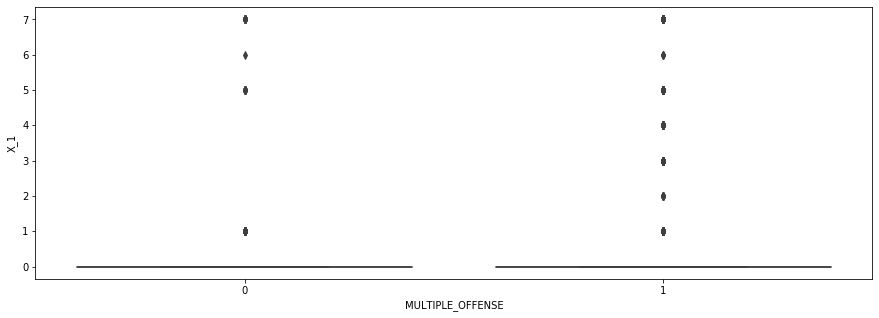

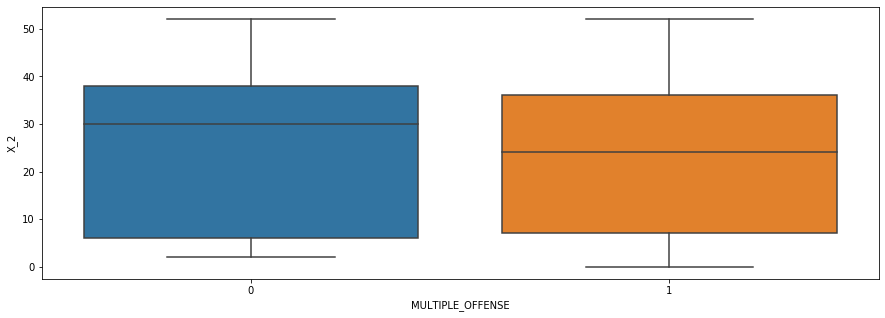

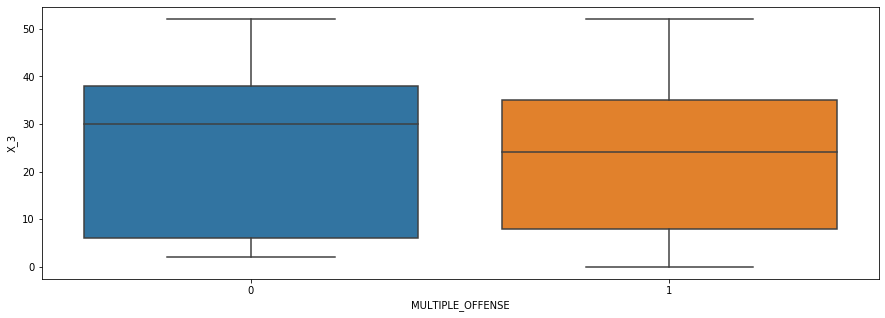

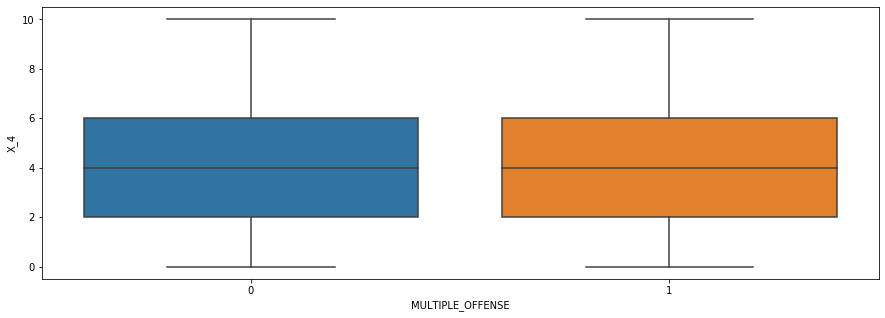

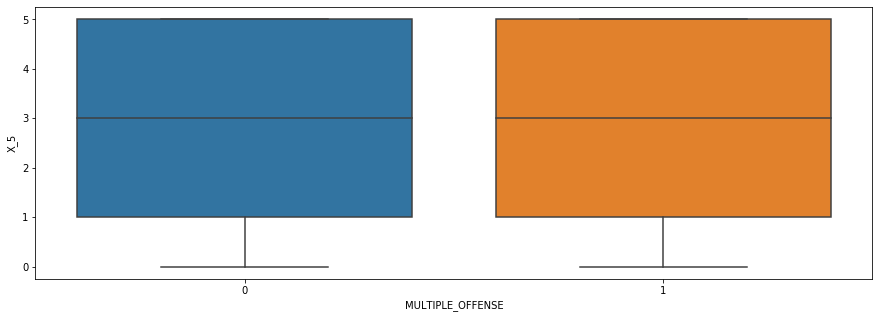

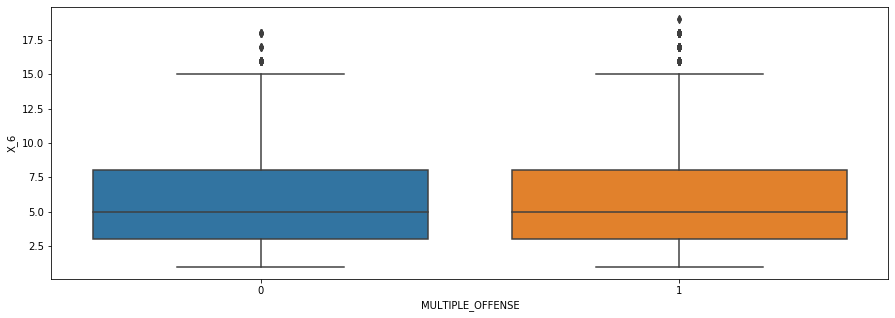

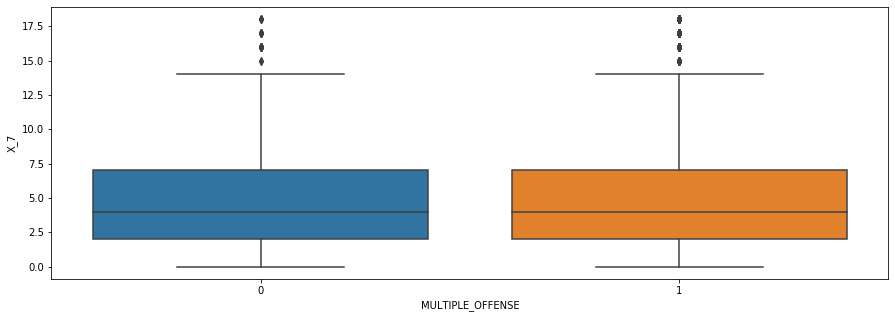

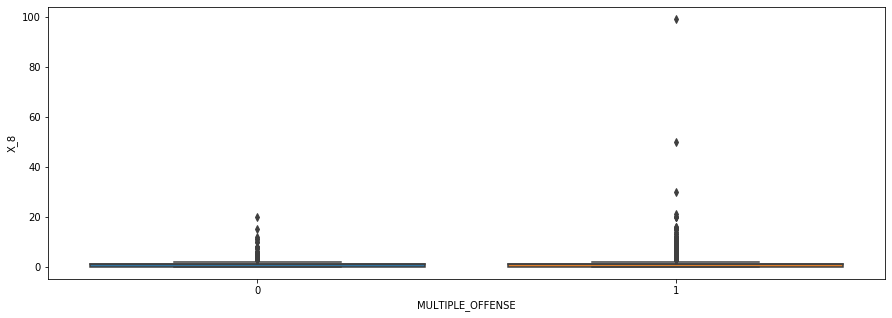

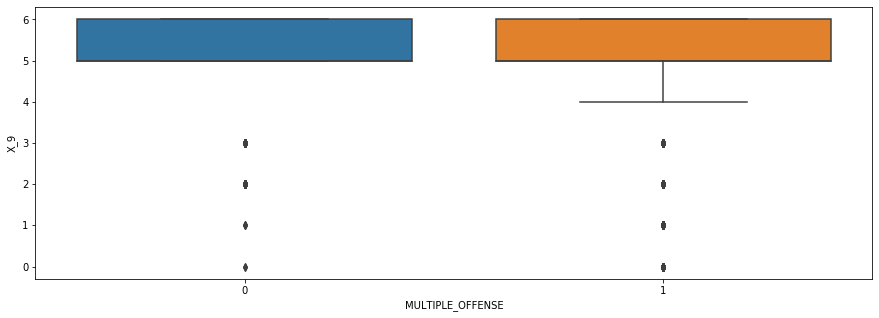

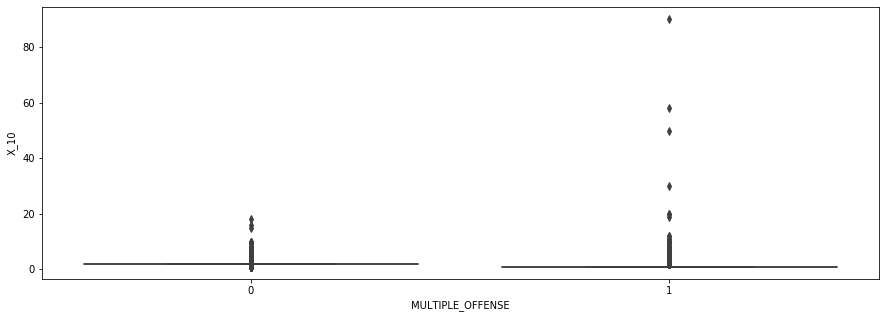

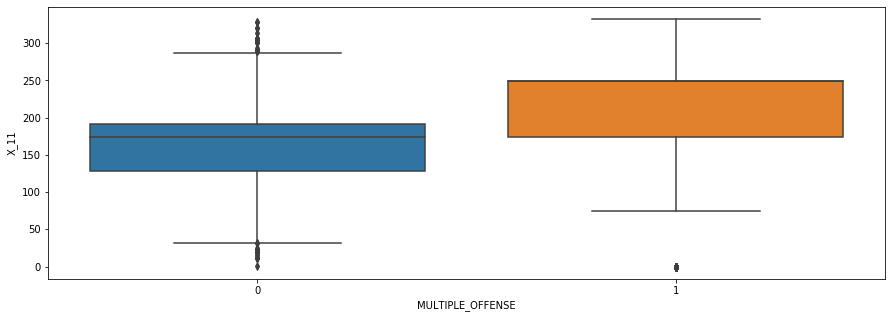

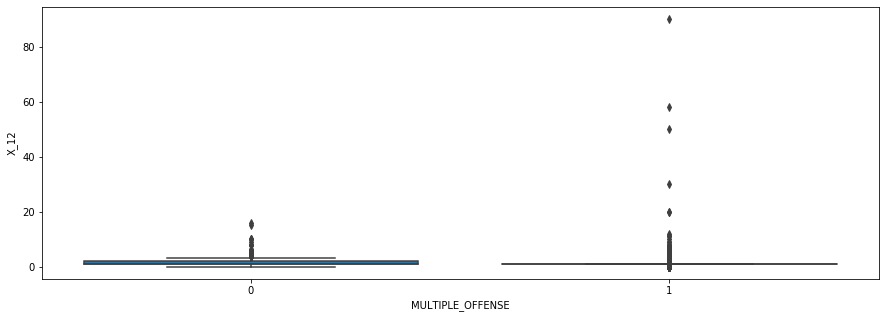

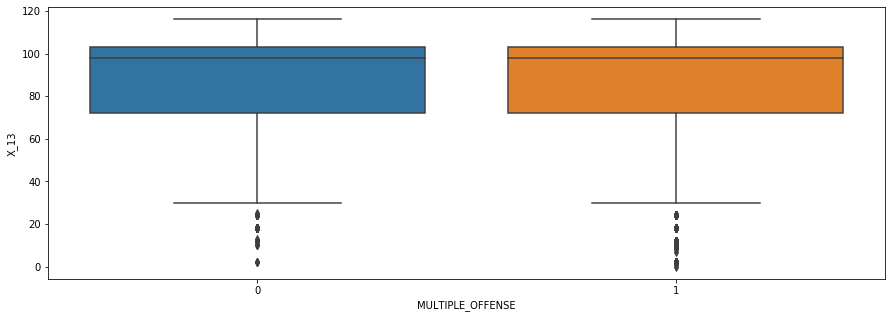

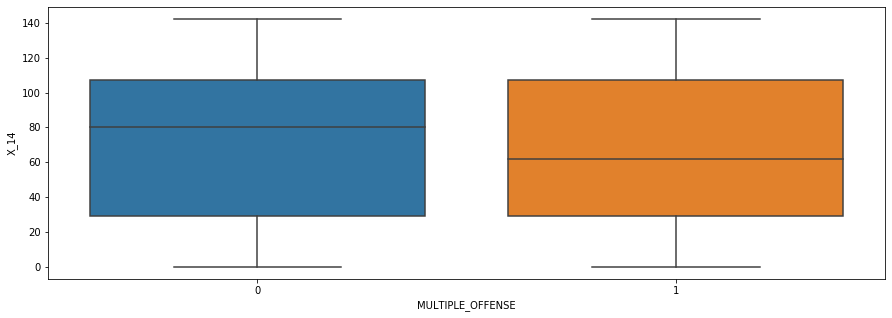

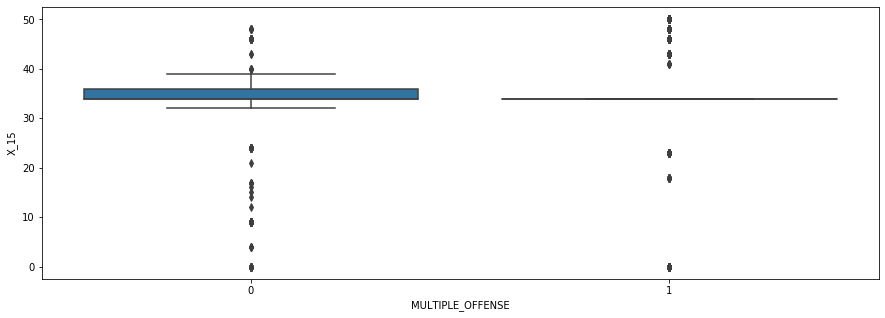

In [18]:
# Plotting boxplots to see the distribution of each variable with 'MULTIPLE_OFFENSE'

for i in num_col:
    plt.figure(figsize=(15,5))
    sns.boxplot(x='MULTIPLE_OFFENSE',y=i,data=train_raw)
    plt.show()

In [19]:
train_raw.describe(percentiles = [0.05,0.25,0.5,0.75,0.8,0.85,0.95,0.99,0.995])

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,18937.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,0.477468,24.765248,24.612031,4.271851,2.450796,6.184029,4.888283,0.976996,4.923758,1.244708,206.806802,0.973755,85.313771,72.783955,33.512471,0.954884
std,1.422108,15.205350,15.095888,2.938875,1.964107,4.488987,3.888437,1.483033,1.361659,1.142822,93.295054,1.193339,27.522322,43.359015,8.353694,0.207565
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,18.000000,29.000000,23.000000,1.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
80%,1.000000,38.000000,38.000000,7.000000,5.000000,9.000000,8.000000,1.000000,6.000000,1.000000,313.000000,1.000000,103.000000,119.000000,34.000000,1.000000
85%,1.000000,42.000000,42.000000,7.000000,5.000000,12.000000,10.000000,2.000000,6.000000,2.000000,316.000000,1.000000,103.000000,130.000000,34.000000,1.000000


### Observation :

#### Variables X_8, X_10 and X_12 have extreme values. Clearly these are outliers. It is decided to remove rows where values of each column are greater than their respective 99.5 percentile (as number of records are available are less).

In [20]:
#Removing outliers

train_df = train_raw.loc[(train_raw['X_8'] <=train_raw['X_8'].quantile(0.995)) & (train_raw['X_10'] <=train_raw['X_10'].quantile(0.995))
                          & (train_raw['X_12'] <=train_raw['X_12'].quantile(0.995))]
train_df.describe(percentiles = [0.05,0.25,0.5,0.75,0.8,0.85,0.95,0.99,0.995])

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000
mean,0.474116,24.777790,24.628086,4.269286,2.448686,6.195714,4.893586,0.921736,4.927814,1.202271,207.372394,0.937730,85.332409,72.705443,33.504665,0.956976
std,1.415621,15.201139,15.093615,2.940612,1.965091,4.486387,3.887120,1.021603,1.360963,0.549170,93.272969,0.697208,27.528382,43.366007,8.283256,0.202916
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,18.000000,29.000000,23.000000,1.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
80%,1.000000,38.000000,38.000000,7.000000,5.000000,9.000000,8.000000,1.000000,6.000000,1.000000,313.800000,1.000000,103.000000,119.000000,34.000000,1.000000
85%,1.000000,42.000000,42.000000,7.000000,5.000000,12.000000,10.000000,2.000000,6.000000,2.000000,316.000000,1.000000,103.000000,130.000000,34.000000,1.000000


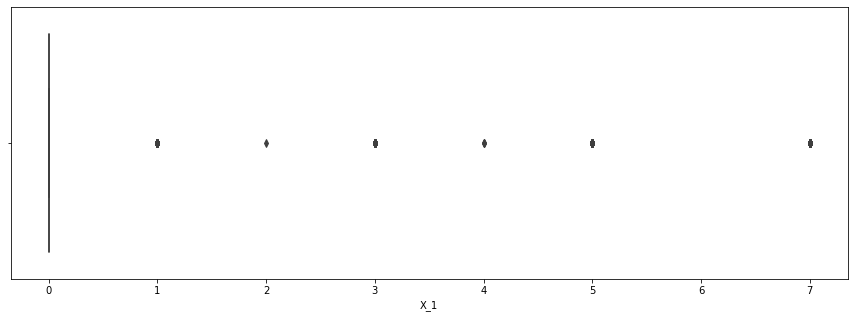

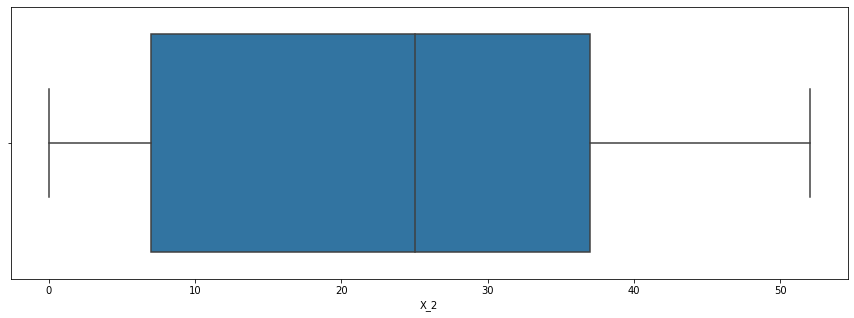

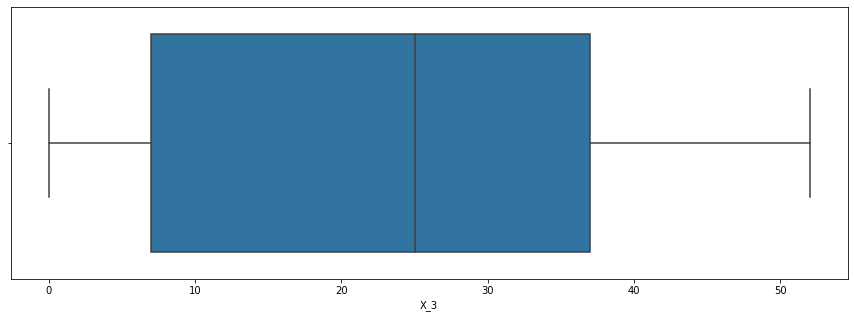

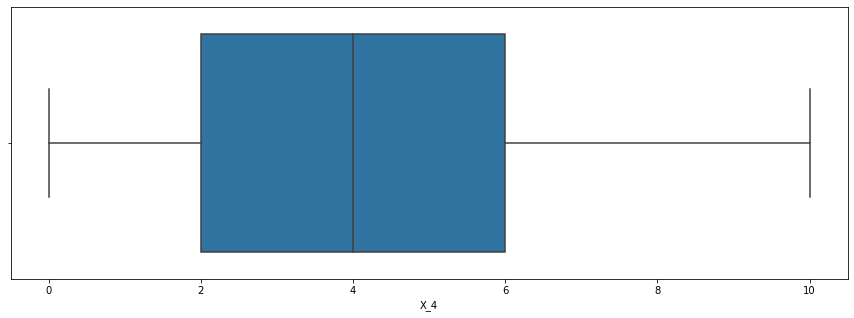

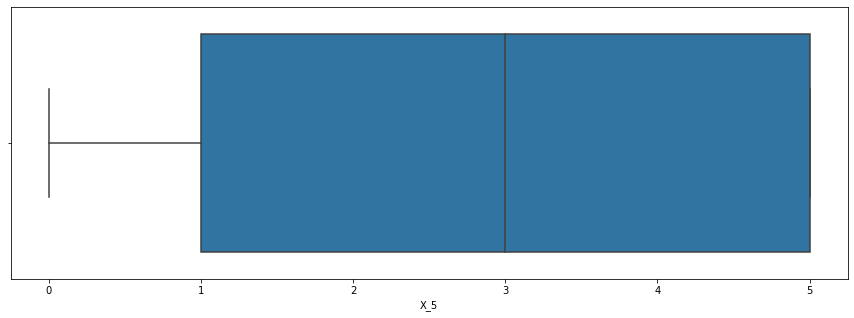

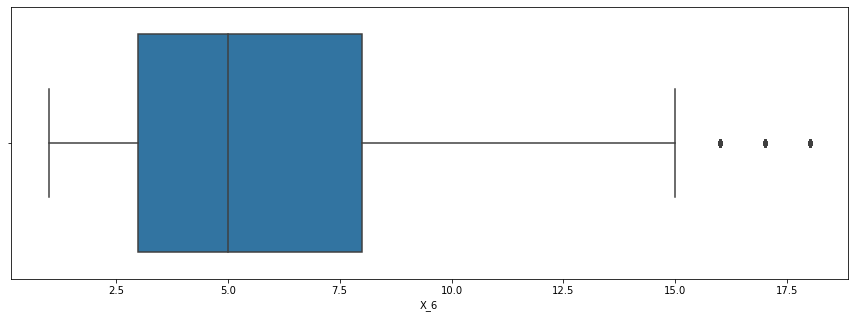

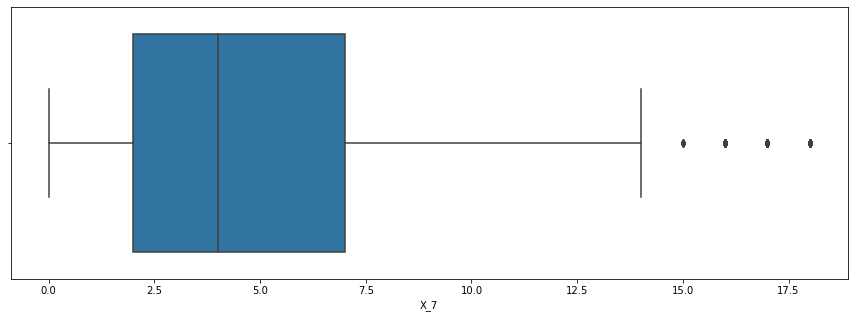

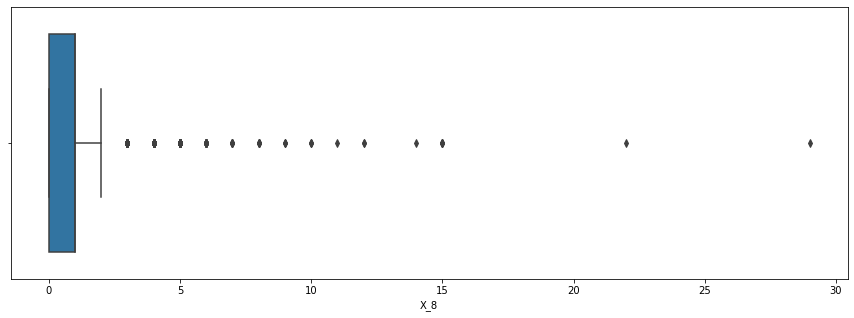

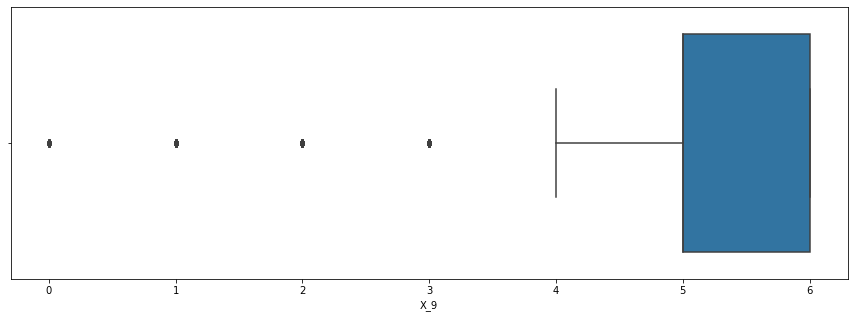

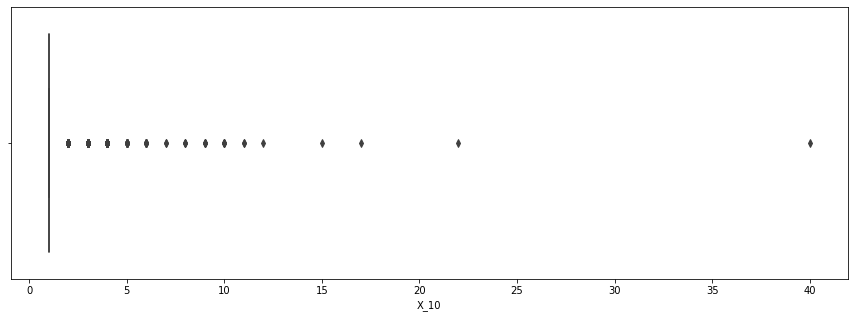

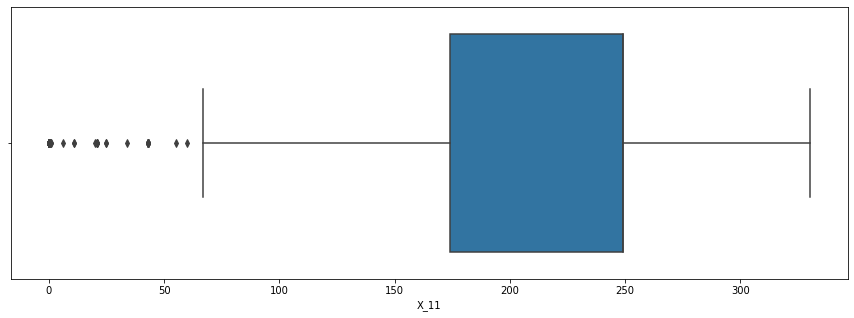

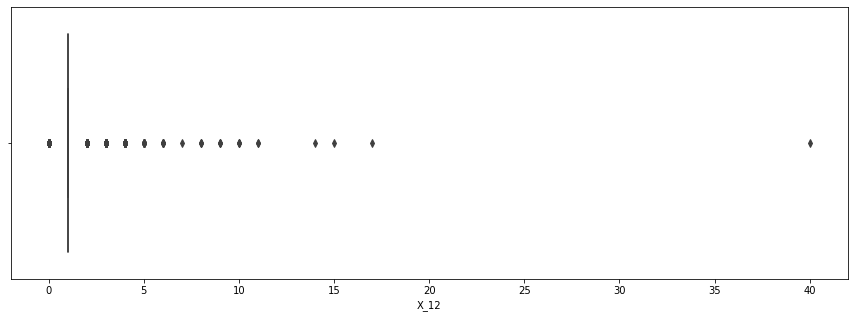

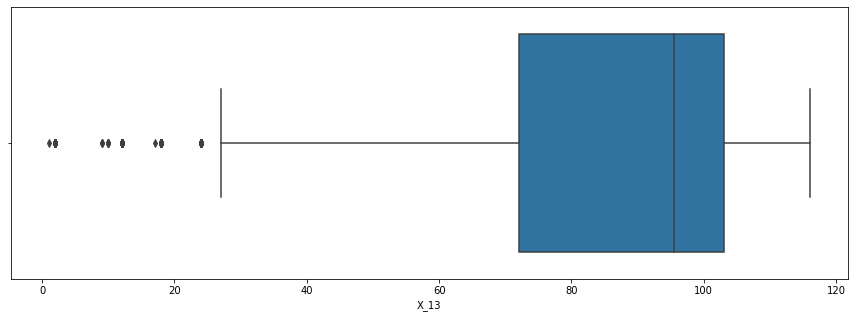

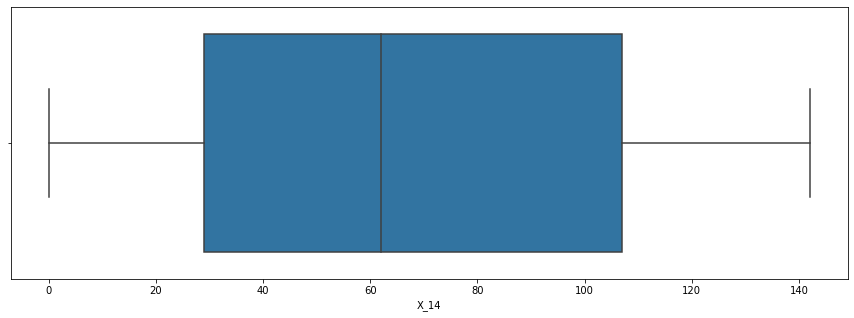

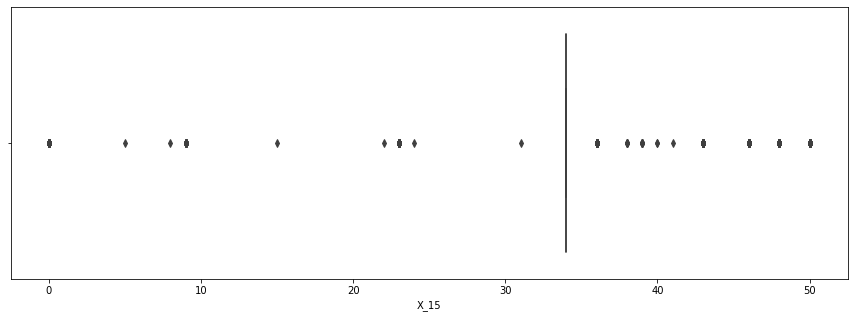

In [21]:
# Checking outliers for test_raw dataframe

for i in num_col:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=i,data=test_raw)
    plt.show()

In [22]:
test_raw.describe(percentiles = [0.05,0.25,0.5,0.75,0.8,0.85,0.95,0.99,0.995])

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,4737.000000,4772.000000,4772.00000,4772.000000
mean,0.509011,24.895013,24.739103,4.296312,2.474853,6.034786,4.829422,0.954317,4.925608,1.245180,207.545264,0.975301,84.931894,72.23575,33.273889
std,1.508073,15.380103,15.292044,2.967970,1.959129,4.400611,3.855848,1.326893,1.366622,1.019937,91.986622,1.059277,27.895585,43.05144,8.516287
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000
5%,0.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,18.000000,29.00000,22.550000
25%,0.000000,7.000000,7.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.00000,34.000000
50%,0.000000,25.000000,25.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,95.500000,62.00000,34.000000
75%,0.000000,37.000000,37.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.00000,34.000000
80%,0.000000,39.000000,39.000000,7.000000,5.000000,9.000000,8.000000,1.000000,6.000000,1.000000,303.000000,1.000000,103.000000,119.00000,34.000000
85%,1.000000,44.000000,44.000000,7.000000,5.000000,10.000000,10.000000,2.000000,6.000000,1.000000,316.000000,1.000000,109.000000,130.00000,34.000000


### Observation :

#### 1. Variables X_8, X_10 and X_12 have extreme values. Clearly these are outliers. It is recommended to remove rows where values of each column are greater than their respective 99.5 percentile. But, here we can't alter the number of rows for test_raw dataframe as we need the exact number for submission. Hence it is decided not to remove outliers.

#### 2. Outliers from train_df were removed in order to get a good dataframe to build ML models

### 3.2. Searching for missing values / null values :

In [23]:
# Checking for null values

train_df.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

#### Observation : No null value present in the dataframe train_df . This is a result of earlier outlier removal.


In [24]:
#Searching null values in test_df

pd.DataFrame({"Null value count": test_raw.isnull().sum(), "Null value in %": round(100*(test_raw.isnull().sum()/test_raw.shape[0]),2)})

,Null value count,Null value in %
INCIDENT_ID,0,0.00
DATE,0,0.00
X_1,0,0.00
X_2,0,0.00
X_3,0,0.00
X_4,0,0.00
X_5,0,0.00
X_6,0,0.00
X_7,0,0.00
X_8,0,0.00


#### Observation :
##### 1.Variable X_12 has 0.8 % null values. 
##### 2. X_12 also has outliers (From earlier outlier analysis)
##### 3. As we can not alter the number of rows in test_raw dataframe and X_12 has outliers, it is decided to impute null values with median of X_12


In [25]:
# Treating null values

test_raw['X_12']= test_raw['X_12'].fillna(test_raw['X_12'].median())
test_raw.isnull().sum()

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

In [26]:
test_df = test_raw #NEW NAME 

### 3.3. Checking Skewness :

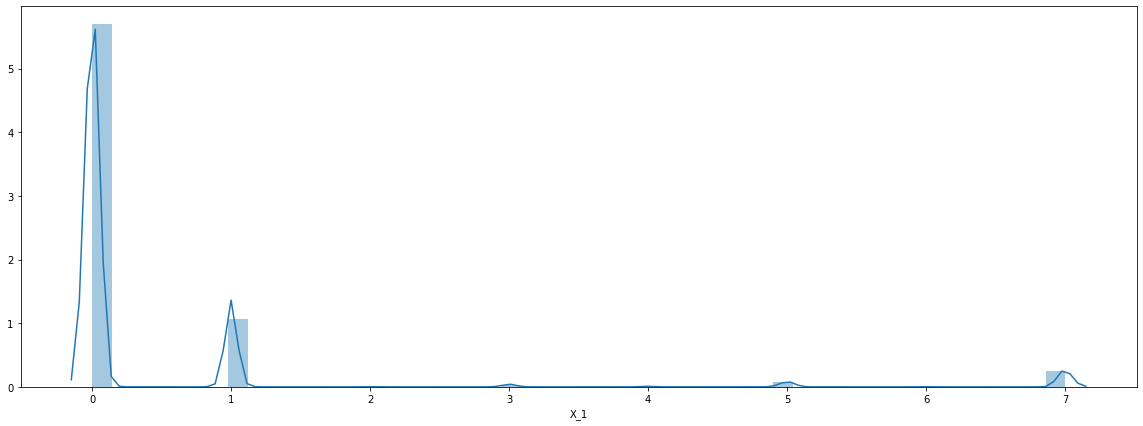

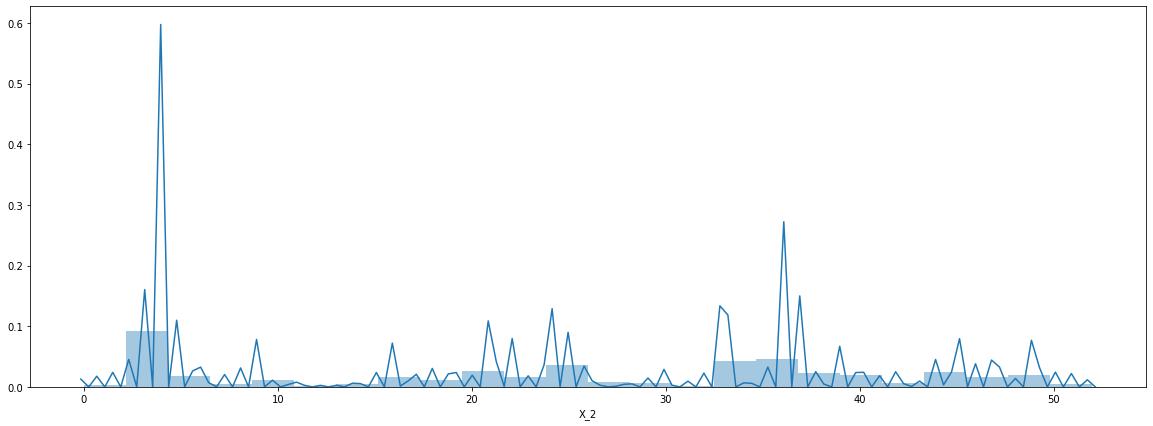

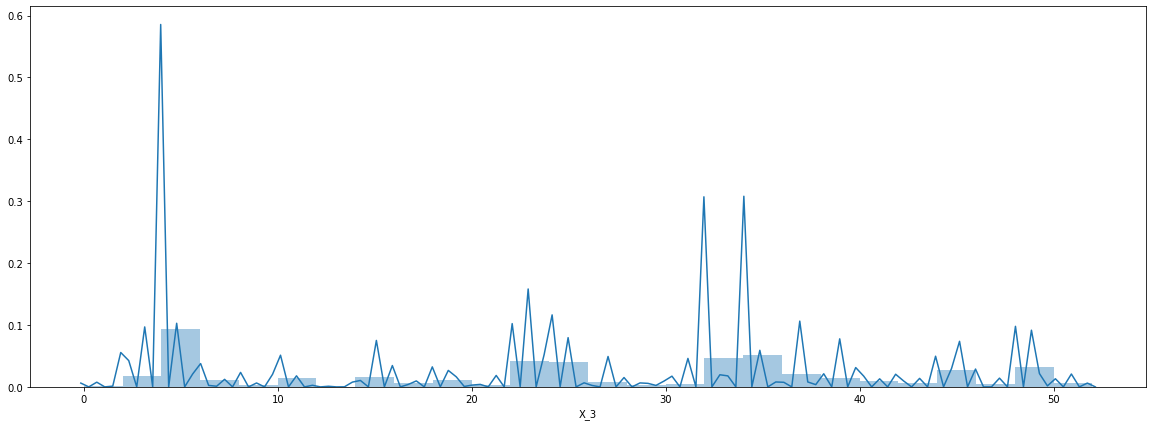

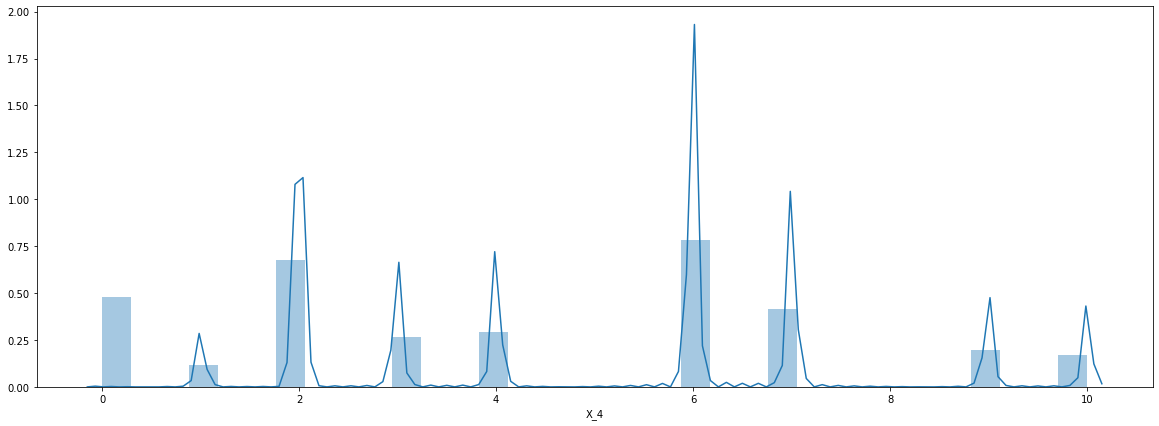

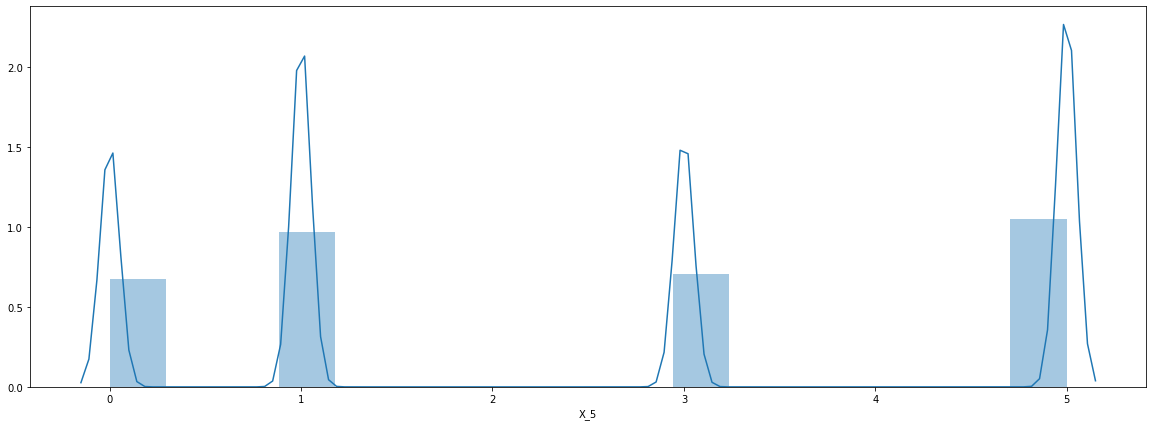

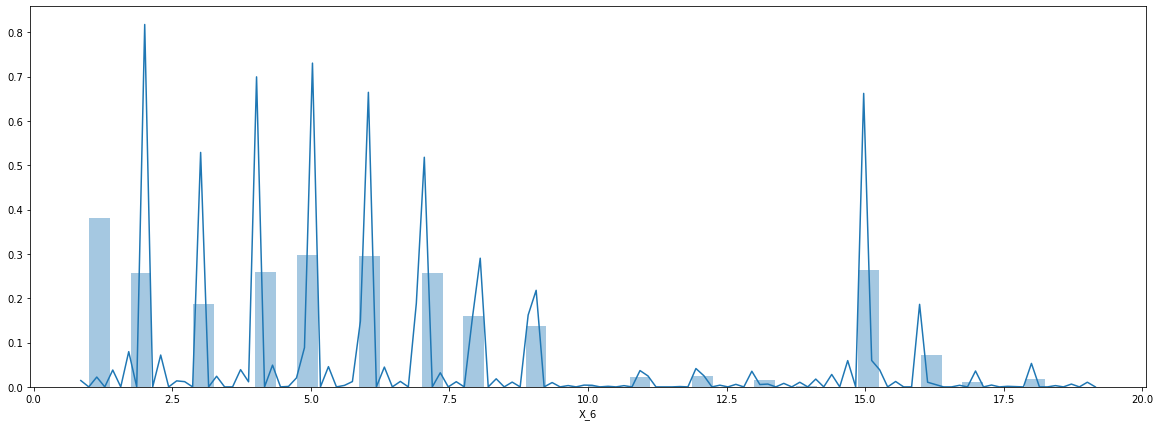

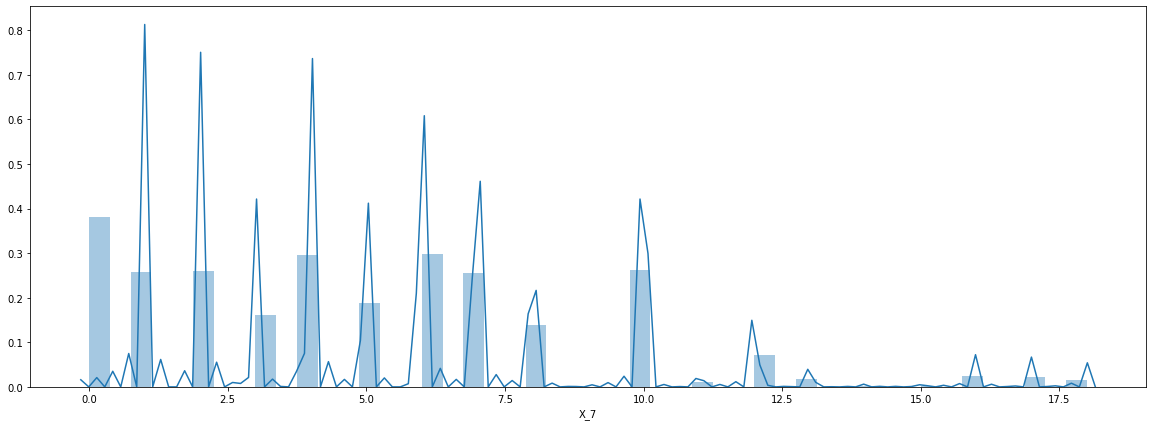

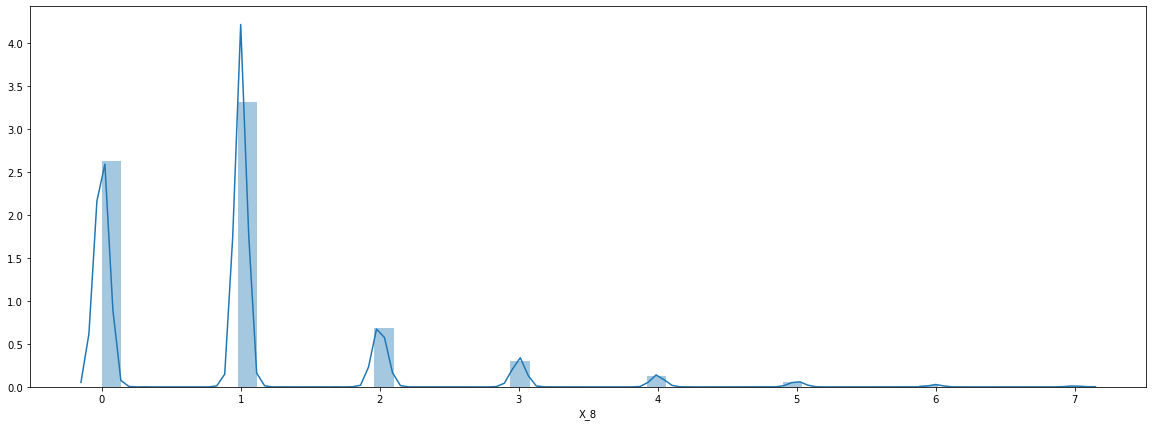

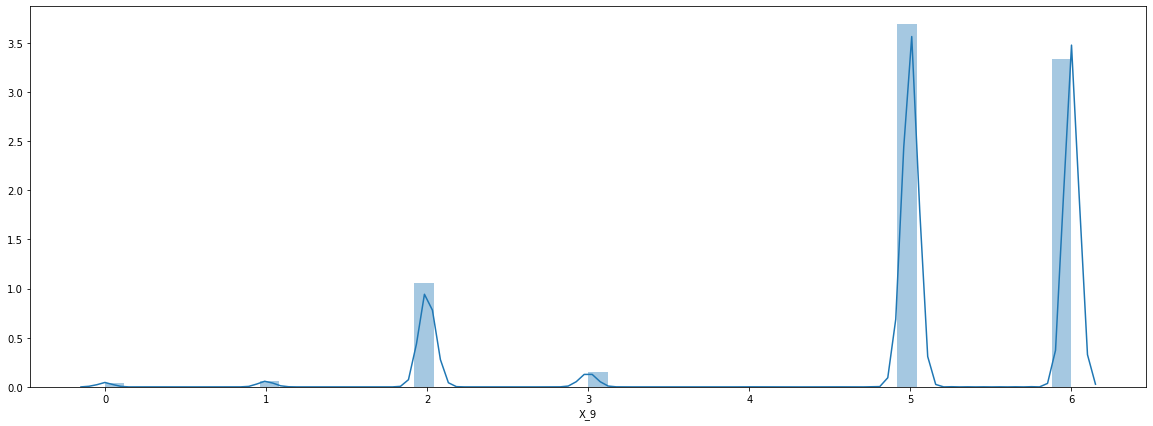

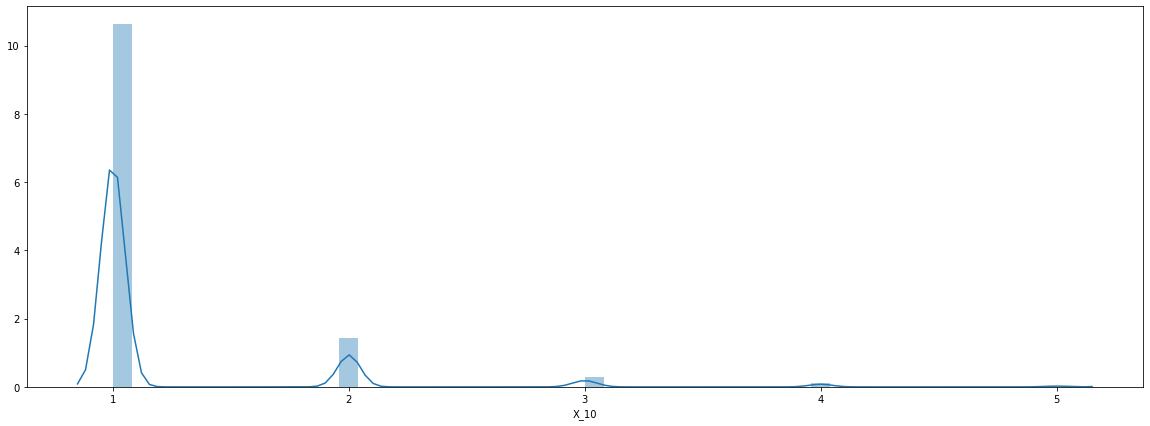

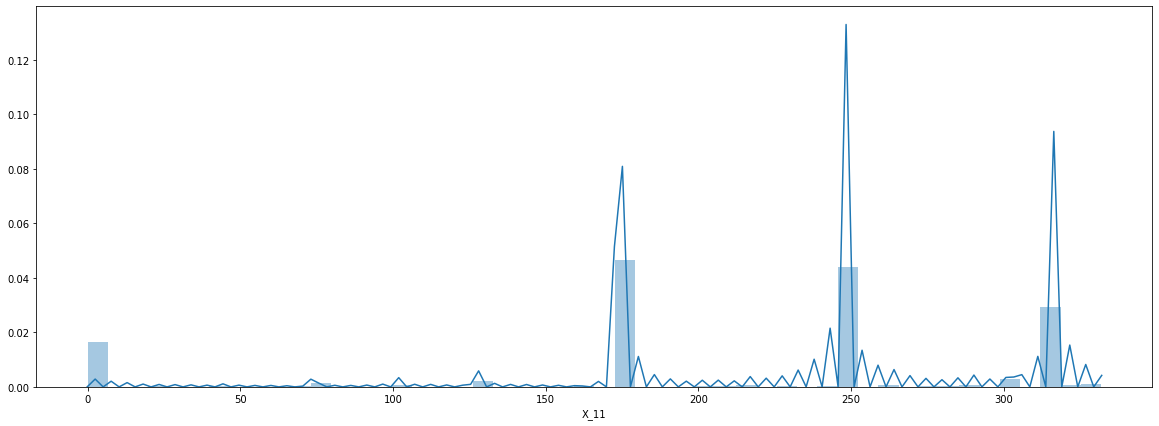

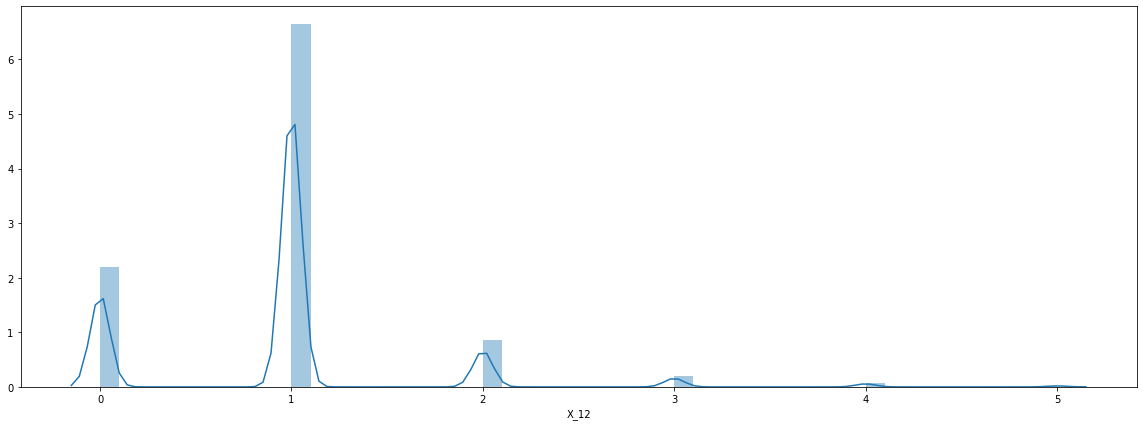

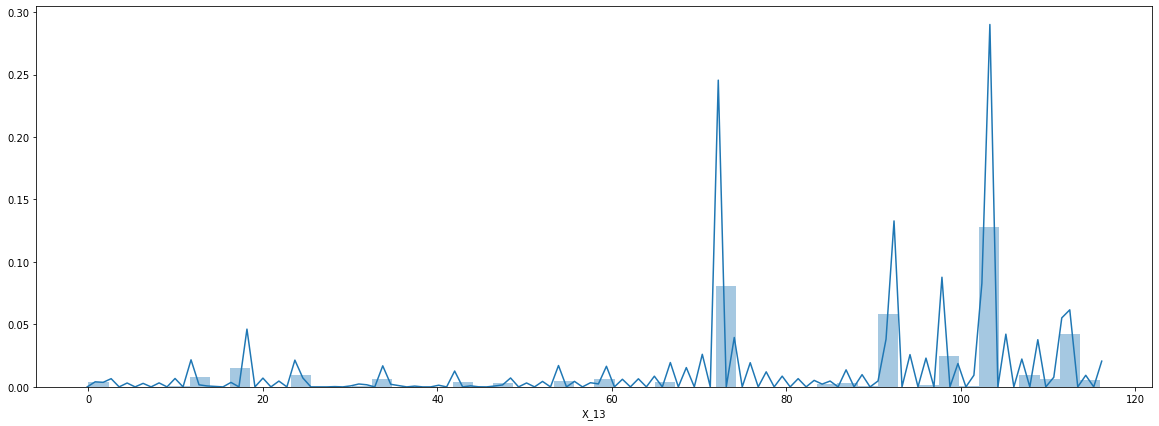

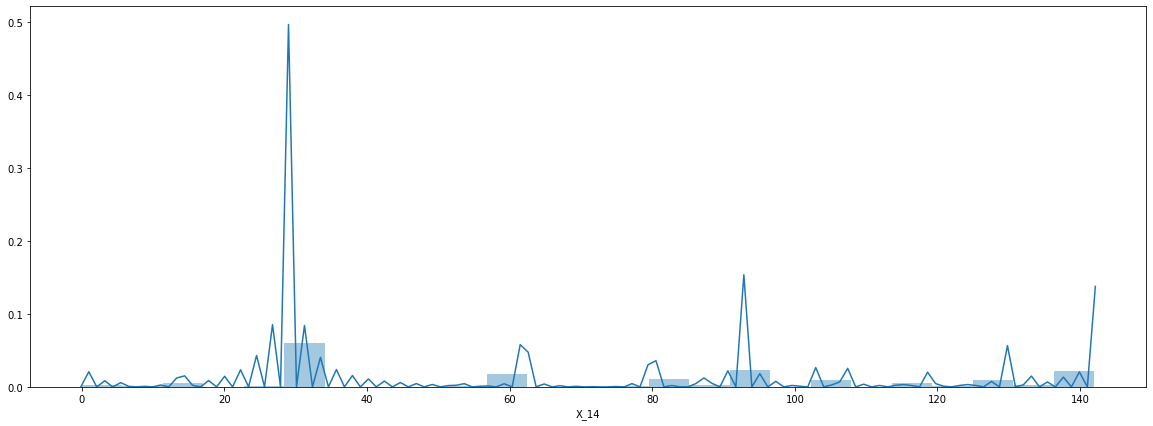

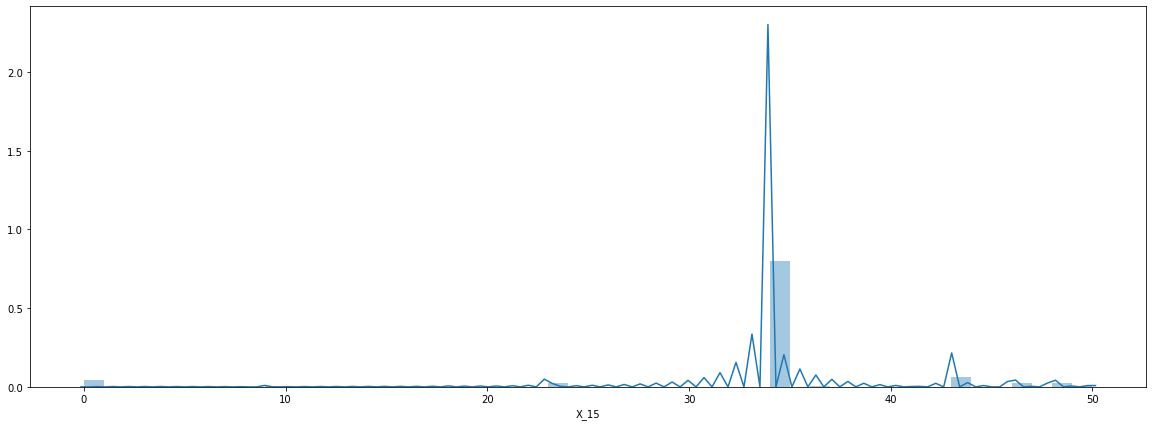

In [27]:
#Checking skewness 

for i in num_col:
    plt.figure(figsize = (20,7))
    sns.distplot(train_df[i],kde_kws={'bw':0.05})
    plt.show()

#### Observation :
##### 1.Above plots show that many variables are categorical in nature.
##### 2. No skewness treatment is required


### 4. Feature engineering:

In [28]:
#Creating function to extract features from date column

def date_feature(df):
    df['Day'] = df['DATE'].dt.day
    df['Month'] = df['DATE'].dt.month
    df['Year'] = df['DATE'].dt.year
    
    return df

In [29]:
# Extracting features

train_df = date_feature(train_df)
test_df = date_feature(test_df)
train_df

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,Day,Month,Year
0,CR_49332,1998-07-16,0,4,4,6,5,6,4,1,...,1,316,1.0,98,62,34,1,16,7,1998
1,CR_161759,2013-06-08,3,4,4,6,5,9,8,1,...,1,316,1.0,54,29,34,1,8,6,2013
3,CR_71855,2000-07-25,1,47,48,7,3,15,10,0,...,1,174,0.0,103,130,34,1,25,7,2000
4,CR_105783,2005-11-15,0,4,4,6,5,3,5,1,...,1,174,0.0,112,29,23,1,15,11,2005
5,CR_25975,1995-10-18,0,4,4,6,5,2,7,0,...,1,249,1.0,54,29,34,1,18,10,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,CR_150519,2011-03-16,7,21,23,4,1,9,8,0,...,1,174,0.0,112,93,0,1,16,3,2011
19080,CR_123749,2007-08-06,1,30,35,7,3,10,15,4,...,1,174,1.0,103,29,34,1,6,8,2007
19081,CR_83880,2002-03-21,0,4,4,6,5,2,7,1,...,2,249,2.0,112,29,34,1,21,3,2002
19082,CR_38497,1996-09-06,1,36,34,2,1,15,10,0,...,1,249,1.0,92,142,34,1,6,9,1996


In [30]:
# Dropping columns 'INCIDENT_ID', 'DATE'

train_df.drop(['INCIDENT_ID', 'DATE'],axis=1, inplace=True)

test_df_id = test_df.pop('INCIDENT_ID') # we need id column for submission 
test_df.drop(['DATE'],axis=1,inplace=True)

train_df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,Day,Month,Year
0,0,4,4,6,5,6,4,1,6,1,316,1.0,98,62,34,1,16,7,1998
1,3,4,4,6,5,9,8,1,6,1,316,1.0,54,29,34,1,8,6,2013
3,1,47,48,7,3,15,10,0,5,1,174,0.0,103,130,34,1,25,7,2000
4,0,4,4,6,5,3,5,1,6,1,174,0.0,112,29,23,1,15,11,2005
5,0,4,4,6,5,2,7,0,5,1,249,1.0,54,29,34,1,18,10,1995


In [31]:
test_df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,Day,Month,Year
0,0,4,4,6,5,1,0,1,6,1,249,1.0,72,29,34,8,5,2001
1,0,33,32,2,1,7,1,0,5,1,249,1.0,116,29,34,28,11,2018
2,0,21,23,4,1,7,1,0,5,2,174,1.0,103,62,40,15,11,1999
3,0,9,10,7,3,6,4,1,5,1,174,0.0,54,93,43,25,3,1999
4,1,44,44,1,3,16,12,1,5,1,174,1.0,103,29,34,16,1,2012


### 5. Spiliting data set into train and test

In [32]:
# Spliting into X and y

y = train_df.pop('MULTIPLE_OFFENSE')
X = train_df
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,Day,Month,Year
0,0,4,4,6,5,6,4,1,6,1,316,1.0,98,62,34,16,7,1998
1,3,4,4,6,5,9,8,1,6,1,316,1.0,54,29,34,8,6,2013
3,1,47,48,7,3,15,10,0,5,1,174,0.0,103,130,34,25,7,2000
4,0,4,4,6,5,3,5,1,6,1,174,0.0,112,29,23,15,11,2005
5,0,4,4,6,5,2,7,0,5,1,249,1.0,54,29,34,18,10,1995


In [33]:
#Spiliting data set into train and test using strtify= y as the data set is highly imbalanced

X_train,X_test,y_train,y_test = train_test_split(train_df,y, train_size = 0.8, random_state = 100,stratify=y) #stratitify y as the data set is highly imbalanced

print('Train data : \n',y_train.value_counts())
print('Test data : \n',y_test.value_counts())

Train data : 
 1    14359
0      646
Name: MULTIPLE_OFFENSE, dtype: int64
Test data : 
 1    3591
0     161
Name: MULTIPLE_OFFENSE, dtype: int64


In [34]:
#Variations of different classes in train & test data set

print('Train data : \n',(y_train.value_counts()/len(y_train))*100,'\n \n')
print('Test data : \n',(y_test.value_counts()/len(y_test))*100)

Train data : 
 1    95.694768
0     4.305232
Name: MULTIPLE_OFFENSE, dtype: float64 
 

Test data : 
 1    95.708955
0     4.291045
Name: MULTIPLE_OFFENSE, dtype: float64


In [35]:
# Checking dimension after spliting

print('len of X = ', len(X),', len of X_train + X_test = ', len(X_train)+len(X_test),', X_train = ',len(X_train),', X_test = ',len(X_test))

len of X =  18757 , len of X_train + X_test =  18757 , X_train =  15005 , X_test =  3752


### 6. Standardizing

In [36]:
#Standardizing

scaler = StandardScaler() #initialization of StandardScaler

colx = X_train.columns

X_train[colx] = scaler.fit_transform( X_train[colx])
X_train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,Day,Month,Year
4238,-0.335956,-0.046079,-0.036776,-1.451995,-1.249981,0.618739,0.792343,-0.906959,0.049208,-0.366894,-0.357454,0.085325,0.640467,0.470922,0.063533,0.388957,0.758603,0.108976
16366,-0.335956,0.544032,0.491344,-0.773002,-0.741978,-0.269805,0.279683,-0.906959,0.049208,-0.366894,-0.357454,-1.348384,0.240348,0.470922,1.156915,0.388957,-1.063818,0.367789
17773,-0.335956,-1.357436,-1.357076,0.584984,1.290032,-0.269805,0.279683,-0.906959,0.049208,-0.366894,-1.128296,-1.348384,0.967837,1.071556,1.764349,-1.433499,1.669814,-1.185090
3265,-0.335956,-1.357436,-1.357076,0.584984,1.290032,-0.714078,0.023352,0.074288,0.785369,-0.366894,0.445507,0.085325,-1.869371,-0.245219,0.063533,-0.636175,-1.671291,-0.149837
2633,-0.335956,-1.357436,-1.357076,0.584984,1.290032,-1.158350,-1.258299,0.074288,0.785369,-0.366894,0.445507,0.085325,-0.669014,-1.007562,0.063533,1.414089,-1.063818,-0.279244


In [37]:
# Standardizing X_test

X_test[colx] = scaler.transform(X_test[colx])
X_test.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,Day,Month,Year
6872,4.624282,-0.242782,-0.102791,-0.094009,-0.741978,0.618739,0.792343,-0.906959,0.049208,-0.366894,-0.357454,-1.348384,-0.487141,0.632631,-4.067022,0.047247,1.669814,1.791262
64,-0.335956,-0.439486,-0.432866,1.603473,-1.249981,0.174467,-1.001969,1.055536,-1.423113,1.451820,1.162818,1.519034,-0.050648,-1.677500,0.063533,0.730668,-0.152607,0.497196
1058,4.624282,-0.242782,-0.102791,-0.094009,-0.741978,0.618739,0.792343,-0.906959,0.049208,-0.366894,-0.357454,-1.348384,0.967837,-1.007562,1.764349,1.300186,1.366077,-0.796871
8117,0.372650,1.330846,1.349540,1.942969,0.274027,1.951555,1.305004,0.074288,0.049208,-0.366894,0.445507,0.085325,-2.233116,0.470922,0.063533,1.414089,1.669814,-0.538057
10519,-0.335956,-0.570622,-0.630911,-1.451995,-1.249981,-1.158350,-1.258299,0.074288,-2.159274,-0.366894,-2.220322,0.085325,0.967837,1.602886,0.063533,-0.636175,-1.063818,-0.020431


In [38]:
#Standardizing TRUE test data

test_df[colx] = scaler.transform(test_df[colx])
test_df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,Day,Month,Year
0,-0.335956,-1.357436,-1.357076,0.584984,1.290032,-1.158350,-1.258299,0.074288,0.785369,-0.366894,0.445507,0.085325,-0.487141,-1.007562,0.063533,-0.863982,-0.456344,-0.408651
1,-0.335956,0.544032,0.491344,-0.773002,-0.741978,0.174467,-1.001969,-0.906959,0.049208,-0.366894,0.445507,0.085325,1.113335,-1.007562,0.063533,1.414089,1.366077,1.791262
2,-0.335956,-0.242782,-0.102791,-0.094009,-0.741978,0.174467,-1.001969,-0.906959,0.049208,1.451820,-0.357454,0.085325,0.640467,-0.245219,0.792454,-0.066657,1.366077,-0.667464
3,-0.335956,-1.029597,-0.960986,0.924480,0.274027,-0.047669,-0.232978,0.074288,0.049208,-0.366894,-0.357454,-1.348384,-1.141882,0.470922,1.156915,1.072379,-1.063818,-0.667464
4,0.372650,1.265279,1.283525,-1.112498,0.274027,2.173691,1.817665,0.074288,0.049208,-0.366894,-0.357454,0.085325,0.640467,-1.007562,0.063533,0.047247,-1.671291,1.014822


### 7. Treating Imbalance + Model Building :

 #### Please note that after hyperparameter tunning using cross validation, certain parameters are tunned manually by taking different values. Hence final model contains parameters either from the result of cross validation or manual tunning.
    

In [39]:
# Using RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler #undersampling

usm = RandomUnderSampler(random_state =25)

X_train_us,y_train_us = usm.fit_resample(X_train,y_train)

X_train_us =pd.DataFrame(X_train_us,columns = colx)

print('Shape of X_train after random undersampling : {}'.format(X_train_us.shape))
print('Shape of original X_train : {}'.format(X_train.shape))
X_train_us.head()
X_train_us

Using TensorFlow backend.


Shape of X_train after random undersampling : (1292, 18)
Shape of original X_train : (15005, 18)


,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,Day,Month,Year
0,-0.335956,-1.226301,-1.225046,-0.094009,-0.741978,-0.047669,-0.232978,1.055536,0.785369,1.451820,-0.303923,0.085325,-0.487141,0.470922,0.306506,0.161150,0.454866,0.238382
1,-0.335956,1.330846,1.349540,1.942969,0.274027,-0.714078,0.023352,0.074288,0.785369,1.451820,-0.303923,0.085325,-1.869371,-1.007562,-2.973640,-1.091789,0.151130,-1.055684
2,-0.335956,-1.357436,-1.357076,0.584984,1.290032,-1.158350,-1.258299,1.055536,-2.159274,5.089249,0.595393,1.519034,-0.487141,0.170605,0.063533,-0.977885,-1.671291,-0.926277
3,-0.335956,-0.046079,-0.036776,-1.451995,-1.249981,0.396603,-0.489308,-0.906959,0.049208,1.451820,1.291291,0.085325,-0.487141,1.602886,-2.973640,0.502861,1.062340,-0.796871
4,-0.335956,1.265279,1.283525,-1.112498,0.274027,0.618739,0.792343,0.074288,0.785369,1.451820,-0.025563,-1.348384,0.640467,0.701935,0.063533,-0.522271,-1.367554,-0.408651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,0.372650,-0.570622,-0.630911,-1.451995,-1.249981,2.173691,1.817665,-0.906959,0.049208,1.451820,1.162818,1.519034,0.640467,0.794340,0.063533,0.388957,0.758603,0.238382
1288,-0.335956,0.085057,0.161269,1.603473,-1.249981,-0.714078,0.023352,0.074288,0.785369,-0.366894,-2.220322,0.085325,-0.487141,-1.007562,0.063533,0.502861,0.758603,1.273635
1289,-0.335956,-1.357436,-1.357076,0.584984,1.290032,-1.158350,-1.258299,0.074288,0.785369,-0.366894,1.162818,0.085325,-0.487141,-0.245219,0.063533,-0.180560,-0.152607,0.626602
1290,-0.335956,0.937439,0.953450,0.584984,1.290032,-0.491941,-0.745638,0.074288,0.785369,-0.366894,0.445507,0.085325,0.640467,-0.245219,0.063533,-1.433499,-1.367554,1.791262


In [40]:
np.bincount(y_train_us)

array([646, 646], dtype=int64)

In [41]:
np.bincount(y_train) # original

array([  646, 14359], dtype=int64)

In [45]:
# HYPERPARAMETER TUNNING 

# Tuning logistic regression

param_log = {'penalty':['l1','l2'],'C':[0.1,.2,.3,.4,.5]}

log = LogisticRegression(class_weight ='balanced',random_state=5)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 90)
grid_log = GridSearchCV(estimator = log, param_grid = param_log, 
                          cv = folds, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

grid_log.fit(X_train_us,y_train_us)

grid_log.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.3s finished


{'C': 0.5, 'penalty': 'l2'}

In [46]:
#building model on best params

logistic = LogisticRegression(class_weight ='balanced',random_state=5,C = 0.5, penalty='l2')

logistic.fit(X_train_us,y_train_us)

#prediction
pred_log_sm_train = logistic.predict_proba(X_train_us)[:,1]
pred_log_sm_test = logistic.predict_proba(X_test)[:,1]

y_pred = logistic.predict(X_test)
# Score

print ( 'Train auc score : ', roc_auc_score(y_train_us,pred_log_sm_train))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_log_sm_test))

print(classification_report(y_test,y_pred))

log_us_auc_test_cv = roc_auc_score(y_test, pred_log_sm_test)
precision_log_us_cv = precision_score(y_test,y_pred)
recall_log_us_cv = recall_score(y_test,y_pred)
f1_log_us_cv = f1_score(y_test,y_pred)

Train auc score :  0.9402059829960989
Test auc score :  0.9246062014940732
              precision    recall  f1-score   support

           0       0.26      0.85      0.40       161
           1       0.99      0.89      0.94      3591

    accuracy                           0.89      3752
   macro avg       0.63      0.87      0.67      3752
weighted avg       0.96      0.89      0.92      3752



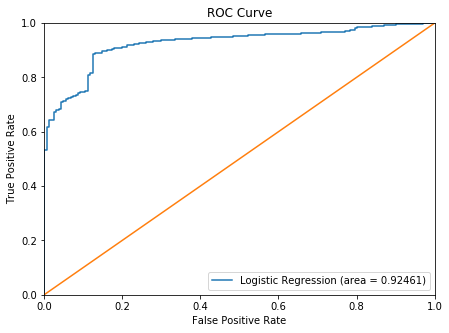

In [47]:
# plotting ROC curve on test data
fpr, tpr, thresholds = roc_curve(y_test, pred_log_sm_test)
plt.figure(figsize =(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % log_us_auc_test_cv)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
# Random forest

# Hyperparameter tuning for random forest

param_rf = {
    'max_depth': [8,10],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split':range(50, 200, 50),
    'n_estimators': [100,150,200,300], 
    'max_features': [5, 10,15,20]
    
}

rf = RandomForestClassifier(n_jobs=-1,class_weight ='balanced',random_state=105)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 90)
# Instantiate 
grid_rf = RandomizedSearchCV(estimator = rf, param_distributions = param_rf, 
                          cv = folds, n_jobs = -1,verbose = 1,scoring = 'roc_auc',random_state =100)


#fitting
grid_rf.fit(X_train_us,y_train_us)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=90, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples...
                     

In [51]:
#best params

grid_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 50,
 'max_features': 15,
 'max_depth': 10}

In [52]:
#using best params

forest_cv = RandomForestClassifier(n_estimators=300,
                                   min_samples_split=100, min_samples_leaf=50,
                                   max_features=15,max_depth=10,
                                   n_jobs=-1,class_weight ='balanced',random_state=1055)

forest_cv.fit(X_train_us,y_train_us)


#prediction

pred_rf_train_cv= forest_cv.predict_proba(X_train_us)[:,1]
pred_rf_test_cv = forest_cv.predict_proba(X_test)[:,1]

y_pred = forest_cv.predict(X_test)
#score
print ( 'Train auc score : ', roc_auc_score(y_train_us,pred_rf_train_cv))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_rf_test_cv))

print(classification_report(y_test,y_pred))

forest_us_auc_test_cv = roc_auc_score(y_test,pred_rf_test_cv)
precision_rf_us_cv = precision_score(y_test,y_pred)
recall_rf_us_cv = recall_score(y_test,y_pred)
f1_rf_us_cv = f1_score(y_test,y_pred)

Train auc score :  0.9801852792608
Test auc score :  0.9717495948290327
              precision    recall  f1-score   support

           0       0.23      0.99      0.37       161
           1       1.00      0.85      0.92      3591

    accuracy                           0.86      3752
   macro avg       0.61      0.92      0.65      3752
weighted avg       0.97      0.86      0.90      3752



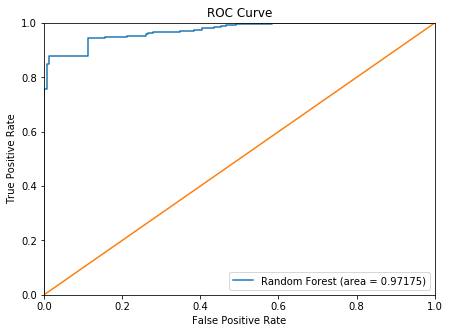

In [53]:
# plotting ROC curve on test data 
fpr, tpr, thresholds = roc_curve(y_test, pred_rf_test_cv)
plt.figure(figsize =(7,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.5f)' % forest_us_auc_test_cv )
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [54]:
# Hypertunning the xgb

param_xgb = {
    'max_depth': [4,6,8],
    'learning_rate': [0.1,0.3,0.5,0.75],
    'n_estimators': [100,150,200],
    'subsample':[0.3,0.50,.75]
    
}

xgb= XGBClassifier(booster='gbtree',
       n_jobs=-1, objective='binary:logistic', random_state=20,
       reg_alpha=1, reg_lambda=0)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 90)
# Instantiate
grid_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = param_xgb, 
                          cv = folds, n_jobs = -1,verbose = 1,scoring = 'roc_auc',random_state =100)

grid_xgb.fit(X_train_us,y_train_us)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.0s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=90, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='bin...
                                           reg_lambda=0, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecat

In [55]:
#best parameters

grid_xgb.best_params_

{'subsample': 0.75, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.3}

In [56]:
xgb= XGBClassifier(booster='gbtree',subsample=0.75,
                   n_estimators = 100,
                   max_depth = 8,
                   learning_rate=0.3,
                   n_jobs=-1,objective='binary:logistic', random_state=20,
                   reg_alpha=0, reg_lambda=1)   

xgb.fit(X_train_us,y_train_us)
#prediction 

pred_xgb_train_cv= xgb.predict_proba(X_train_us)[:,1]
pred_xgb_test_cv = xgb.predict_proba(X_test)[:,1]

y_pred = xgb.predict(X_test)
#score
print ( 'Train auc score : ', roc_auc_score(y_train_us,pred_xgb_train_cv))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_xgb_test_cv))
print(classification_report(y_test,y_pred))


xgb_us_auc_test_cv = roc_auc_score(y_test,pred_xgb_test_cv)
precision_xgb_us_cv = precision_score(y_test,y_pred)
recall_xgb_us_cv = recall_score(y_test,y_pred)
f1_xgb_us_cv = f1_score(y_test,y_pred)

Train auc score :  1.0
Test auc score :  0.9984312056884793
              precision    recall  f1-score   support

           0       0.68      0.99      0.81       161
           1       1.00      0.98      0.99      3591

    accuracy                           0.98      3752
   macro avg       0.84      0.99      0.90      3752
weighted avg       0.99      0.98      0.98      3752



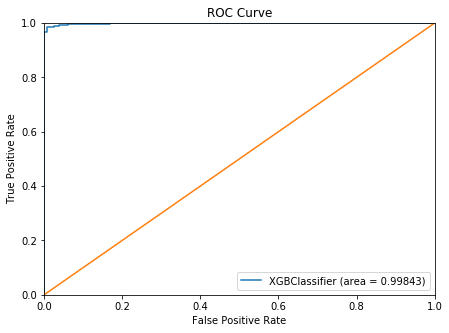

In [57]:
# plotting ROC curve on test data 
fpr, tpr, thresholds = roc_curve(y_test, pred_xgb_test_cv )
plt.figure(figsize =(7,5))
plt.plot(fpr, tpr, label='XGBClassifier (area = %0.5f)' % xgb_us_auc_test_cv )
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [58]:
#SCORE after RandomUnderSampling

auc_score_all =[log_us_auc_test_cv,forest_us_auc_test_cv,xgb_us_auc_test_cv]
recall_all = [recall_log_us_cv,recall_rf_us_cv,recall_xgb_us_cv]
precision_all = [precision_log_us_cv,precision_rf_us_cv,precision_xgb_us_cv]
f1_all =[f1_log_us_cv,f1_rf_us_cv,f1_xgb_us_cv]

us_cv = pd.DataFrame({'auc_score':auc_score_all,'recall':recall_all,'precision':precision_all,'f1_score':f1_all},index =['Logistic Regression','Random Forest','XGBoost'])
us_cv

,auc_score,recall,precision,f1_score
Logistic Regression,0.924606,0.891117,0.992556,0.939105
Random Forest,0.971750,0.852130,0.999347,0.919886
XGBoost,0.998431,0.978836,0.999716,0.989166


In [59]:
# USING ADASYN - oversampling tech

from imblearn.over_sampling import ADASYN

ada = ADASYN (random_state=50)
X_train_adasyn, y_train_ada = ada.fit_resample(X_train, y_train)

X_train_ada =pd.DataFrame(X_train_adasyn,columns = colx) #we are creating a dataframe after the resampling
X_train_ada.head() 



,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,Day,Month,Year
0,-0.335956,-0.046079,-0.036776,-1.451995,-1.249981,0.618739,0.792343,-0.906959,0.049208,-0.366894,-0.357454,0.085325,0.640467,0.470922,0.063533,0.388957,0.758603,0.108976
1,-0.335956,0.544032,0.491344,-0.773002,-0.741978,-0.269805,0.279683,-0.906959,0.049208,-0.366894,-0.357454,-1.348384,0.240348,0.470922,1.156915,0.388957,-1.063818,0.367789
2,-0.335956,-1.357436,-1.357076,0.584984,1.290032,-0.269805,0.279683,-0.906959,0.049208,-0.366894,-1.128296,-1.348384,0.967837,1.071556,1.764349,-1.433499,1.669814,-1.185090
3,-0.335956,-1.357436,-1.357076,0.584984,1.290032,-0.714078,0.023352,0.074288,0.785369,-0.366894,0.445507,0.085325,-1.869371,-0.245219,0.063533,-0.636175,-1.671291,-0.149837
4,-0.335956,-1.357436,-1.357076,0.584984,1.290032,-1.158350,-1.258299,0.074288,0.785369,-0.366894,0.445507,0.085325,-0.669014,-1.007562,0.063533,1.414089,-1.063818,-0.279244


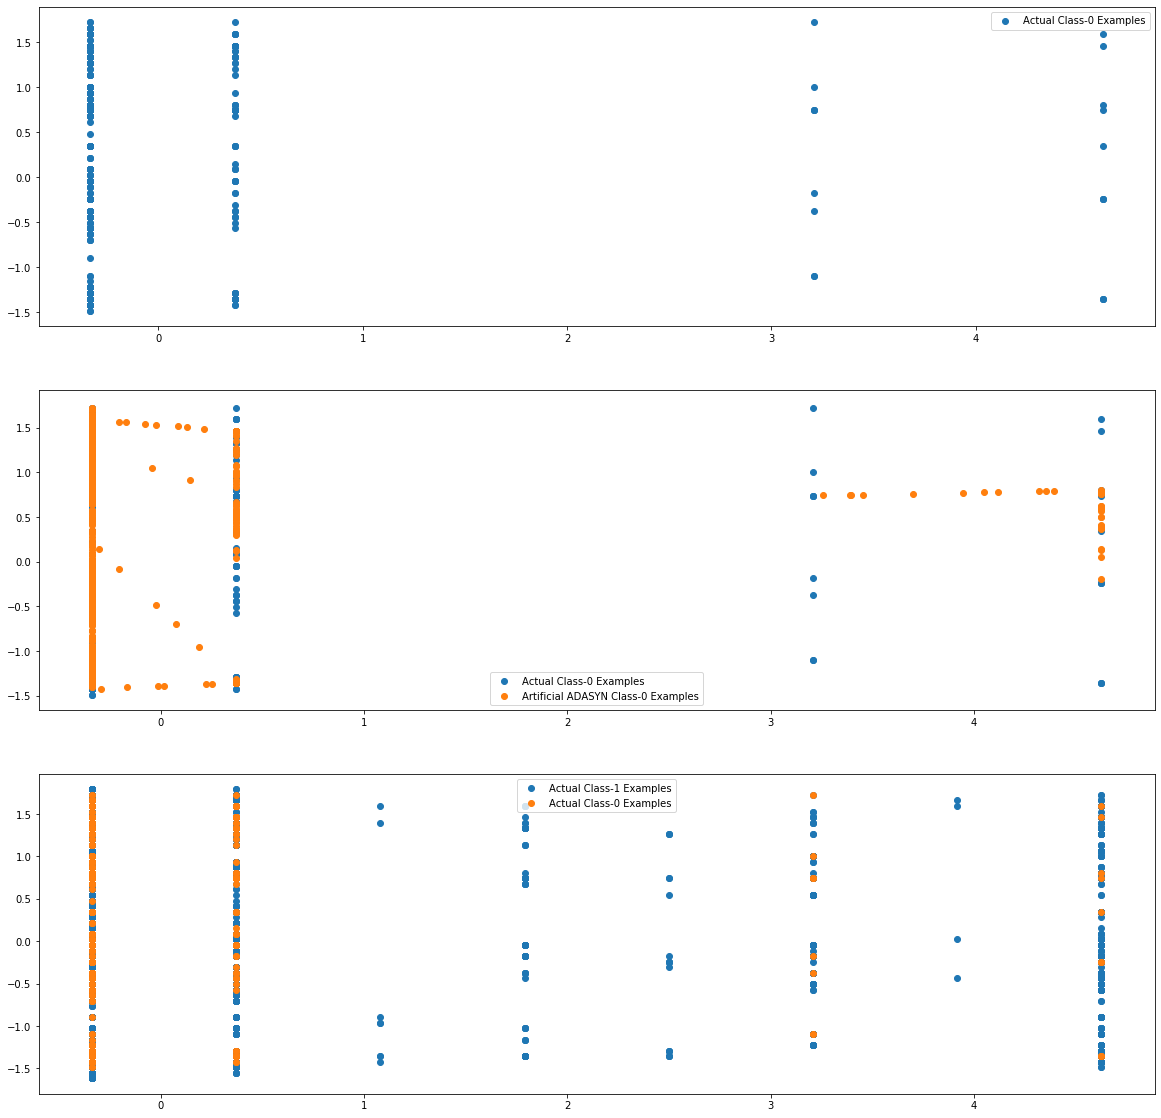

In [60]:
#vizualisation
X_train_adasyn_0 = X_train_adasyn[X_train.shape[0]:]  #Synthetic data points are appended after the original datapoints in the dataframe.
                                                # Hence X_train.shape[0] - original data points and ater this length all are synthetic


# Creating different dataframe for class 0 and 1 separately

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]




plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

#Scatter plot to show orignal class-0 data points (two columns of the same dataframe are taken for scatter plot)
plt.subplot(3, 1, 1)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples') 
plt.legend()

#Scatter plot for original data vs synthetic data 

plt.subplot(3, 1, 2)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_adasyn_0[:X_train_0.shape[0], 0], X_train_adasyn_0[:X_train_0.shape[0], 1],
            label='Artificial ADASYN Class-0 Examples')  # X_train_0.shape[0] = 804 data points 
                                                        # X_train_adasyn_0.shape[0] = 17148 data points
                                                        # X_train_adasyn_0[:X_train_0.shape[0], 0] - so that only 804 data points will be considered for the scatterplot
        
plt.legend()

# Scatter plot to show distribution of original class-0 and class-1 data points
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.legend()

In [61]:
X_train_ada.shape

(28765, 18)

In [62]:
X_train.shape

(15005, 18)

In [63]:
np.bincount(y_train_ada)

array([14406, 14359], dtype=int64)

In [64]:
np.bincount(y_train)

array([  646, 14359], dtype=int64)

In [66]:

# Tuning logistic regression

param_log = {'penalty':['l1','l2'],'C':[0.1,.2,.3,.4,.5]}

log = LogisticRegression(class_weight ='balanced',random_state=5)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 90)
grid_log = GridSearchCV(estimator = log, param_grid = param_log, 
                          cv = folds, n_jobs = -1,verbose = 1, scoring = 'roc_auc')

grid_log.fit(X_train_ada,y_train_ada)

grid_log.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished


{'C': 0.5, 'penalty': 'l2'}

In [67]:
#building model on best params

logistic = LogisticRegression(class_weight ='balanced',random_state=5,C = 0.5, penalty='l2')

logistic.fit(X_train_ada,y_train_ada)

#prediction
pred_log_ada_train = logistic.predict_proba(X_train_ada)[:,1]
pred_log_ada_test = logistic.predict_proba(X_test)[:,1]

y_pred = logistic.predict(X_test)
# Score

print ( 'Train auc score : ', roc_auc_score(y_train_ada,pred_log_ada_train))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_log_ada_test))

print(classification_report(y_test,y_pred))

log_ada_auc_test_cv = roc_auc_score(y_test, pred_log_ada_test)
precision_log_ada_cv = precision_score(y_test,y_pred)
recall_log_ada_cv = recall_score(y_test,y_pred)
f1_log_ada_cv = f1_score(y_test,y_pred)

Train auc score :  0.9379479866922146
Test auc score :  0.9290427587256616
              precision    recall  f1-score   support

           0       0.26      0.86      0.40       161
           1       0.99      0.89      0.94      3591

    accuracy                           0.89      3752
   macro avg       0.63      0.87      0.67      3752
weighted avg       0.96      0.89      0.92      3752



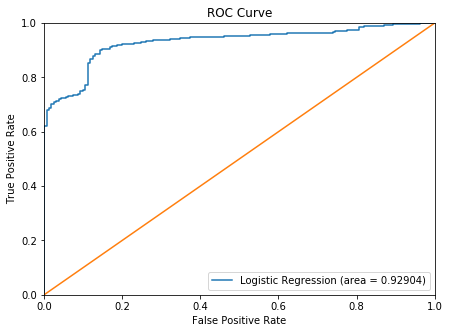

In [68]:
# plotting ROC curve on test data
fpr, tpr, thresholds = roc_curve(y_test, pred_log_ada_test)
plt.figure(figsize =(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % log_ada_auc_test_cv)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [69]:
# Random forest

# Hyperparameter tuning for random forest

param_rf = {
    'max_depth': [8,10],
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split':range(50, 200, 50),
    'n_estimators': [100,150,200], 
    'max_features': [5, 10]
    
}

rf = RandomForestClassifier(n_jobs=-1,class_weight ='balanced',random_state=105)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 90)
# Instantiate
grid_rf = RandomizedSearchCV(estimator = rf, param_distributions = param_rf, 
                          cv = folds, n_jobs = -1,verbose = 1,scoring = 'roc_auc',random_state =100)


# Fitting
grid_rf.fit(X_train_ada,y_train_ada)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=90, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples...
                     

In [70]:
#best params

grid_rf.best_params_

{'n_estimators': 150,
 'min_samples_split': 50,
 'min_samples_leaf': 50,
 'max_features': 10,
 'max_depth': 10}

In [71]:
#using best params

forest_cv = RandomForestClassifier(n_estimators=150,
                                   min_samples_split=50, min_samples_leaf=50,
                                   max_features=10,max_depth=10,
                                   n_jobs=-1,class_weight ='balanced',random_state=1055)

forest_cv.fit(X_train_ada,y_train_ada)


#prediction

pred_rf_train_cv= forest_cv.predict_proba(X_train_ada)[:,1]
pred_rf_test_cv = forest_cv.predict_proba(X_test)[:,1]

y_pred = forest_cv.predict(X_test)
#score
print ( 'Train auc score : ', roc_auc_score(y_train_ada,pred_rf_train_cv))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_rf_test_cv))

print(classification_report(y_test,y_pred))

forest_ada_auc_test_cv = roc_auc_score(y_test,pred_rf_test_cv)
precision_rf_ada_cv = precision_score(y_test,y_pred)
recall_rf_ada_cv = recall_score(y_test,y_pred)
f1_rf_ada_cv = f1_score(y_test,y_pred)

Train auc score :  0.9998176603779656
Test auc score :  0.9980178188743081
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       161
           1       1.00      0.99      0.99      3591

    accuracy                           0.99      3752
   macro avg       0.90      0.97      0.93      3752
weighted avg       0.99      0.99      0.99      3752



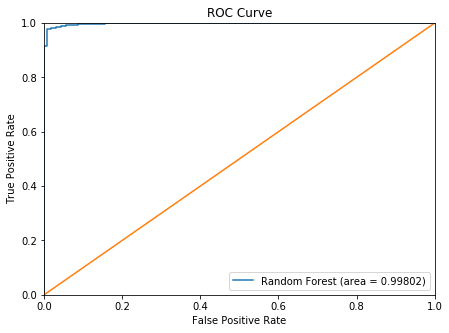

In [72]:
# plotting ROC curve on test data 
fpr, tpr, thresholds = roc_curve(y_test, pred_rf_test_cv)
plt.figure(figsize =(7,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.5f)' % forest_ada_auc_test_cv )
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [73]:
# Hypertunning the xgb
param_xgb = {
    'max_depth': [4,6,8],
    'learning_rate': [0.1,0.3,0.5,0.75],
    'n_estimators': [100,150,200],
    'subsample':[0.3,0.50,.75]
    
}

xgb= XGBClassifier(booster='gbtree',
       n_jobs=-1, objective='binary:logistic', random_state=20,
       reg_alpha=1, reg_lambda=0)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 90)
# Instantiate
grid_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = param_xgb, 
                          cv = folds, n_jobs = -1,verbose = 1,scoring = 'roc_auc',random_state =100)

grid_xgb.fit(X_train_ada,y_train_ada)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=90, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='bin...
                                           reg_lambda=0, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecat

In [74]:
grid_xgb.best_params_

{'subsample': 0.75, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.75}

In [75]:
xgb_ada= XGBClassifier(booster='gbtree',subsample=0.75,
                   n_estimators = 100,
                   max_depth = 4,
                   learning_rate=0.75,
                   n_jobs=-1,objective='binary:logistic', random_state=20,
                   reg_alpha=0, reg_lambda=1)   

xgb_ada.fit(X_train_ada,y_train_ada)
#prediction 

pred_xgb_train_cv= xgb_ada.predict_proba(X_train_ada)[:,1]
pred_xgb_test_cv = xgb_ada.predict_proba(X_test)[:,1]

y_pred = xgb_ada.predict(X_test)
#score
print ( 'Train auc score : ', roc_auc_score(y_train_ada,pred_xgb_train_cv))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_xgb_test_cv))
print(classification_report(y_test,y_pred))


xgb_ada_auc_test_cv = roc_auc_score(y_test,pred_xgb_test_cv)
precision_xgb_ada_cv = precision_score(y_test,y_pred)
recall_xgb_ada_cv = recall_score(y_test,y_pred)
f1_xgb_ada_cv = f1_score(y_test,y_pred)

Train auc score :  1.0
Test auc score :  0.999505319544548
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       161
           1       1.00      1.00      1.00      3591

    accuracy                           1.00      3752
   macro avg       1.00      0.99      0.99      3752
weighted avg       1.00      1.00      1.00      3752



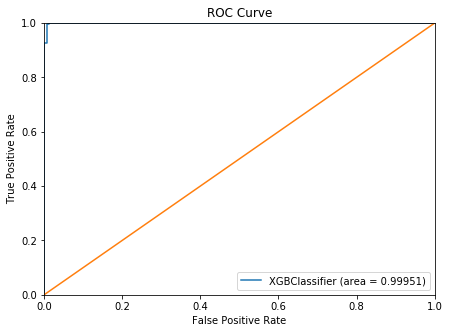

In [76]:
# plotting ROC curve on test data 
fpr, tpr, thresholds = roc_curve(y_test, pred_xgb_test_cv )
plt.figure(figsize =(7,5))
plt.plot(fpr, tpr, label='XGBClassifier (area = %0.5f)' % xgb_ada_auc_test_cv )
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [77]:
#SCORE after ADASYN

auc_score_all =[log_ada_auc_test_cv,forest_ada_auc_test_cv,xgb_ada_auc_test_cv]
recall_all = [recall_log_ada_cv,recall_rf_ada_cv,recall_xgb_ada_cv]
precision_all = [precision_log_ada_cv,precision_rf_ada_cv,precision_xgb_ada_cv]
f1_all =[f1_log_ada_cv,f1_rf_ada_cv,f1_xgb_ada_cv]

ada_cv = pd.DataFrame({'auc_score':auc_score_all,'recall':recall_all,'precision':precision_all,'f1_score':f1_all},index =['Logistic Regression','Random Forest','XGBoost'])
ada_cv

,auc_score,recall,precision,f1_score
Logistic Regression,0.929043,0.891117,0.992864,0.939243
Random Forest,0.998018,0.989975,0.997475,0.993711
XGBoost,0.999505,0.999722,0.998887,0.999304


In [78]:
#Importing SMOTE - oversampling tech

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [79]:
X_train_sm

array([[-0.33595598, -0.04607885, -0.03677571, ...,  0.38895726,
         0.75860318,  0.10897581],
       [-0.33595598,  0.54403198,  0.49134447, ...,  0.38895726,
        -1.06381768,  0.36778905],
       [-0.33595598, -1.35743627, -1.35707618, ..., -1.43349944,
         1.6698136 , -1.18509037],
       ...,
       [-0.33595598,  1.33084643,  1.34953977, ..., -1.32648015,
        -1.20650726, -0.94885223],
       [ 0.37264951, -0.07291738, -0.01766369, ...,  0.68537199,
         1.39538843,  0.61562239],
       [ 0.37264951,  0.74073559,  0.62337452, ..., -0.00859622,
         1.37199096,  0.65832401]])

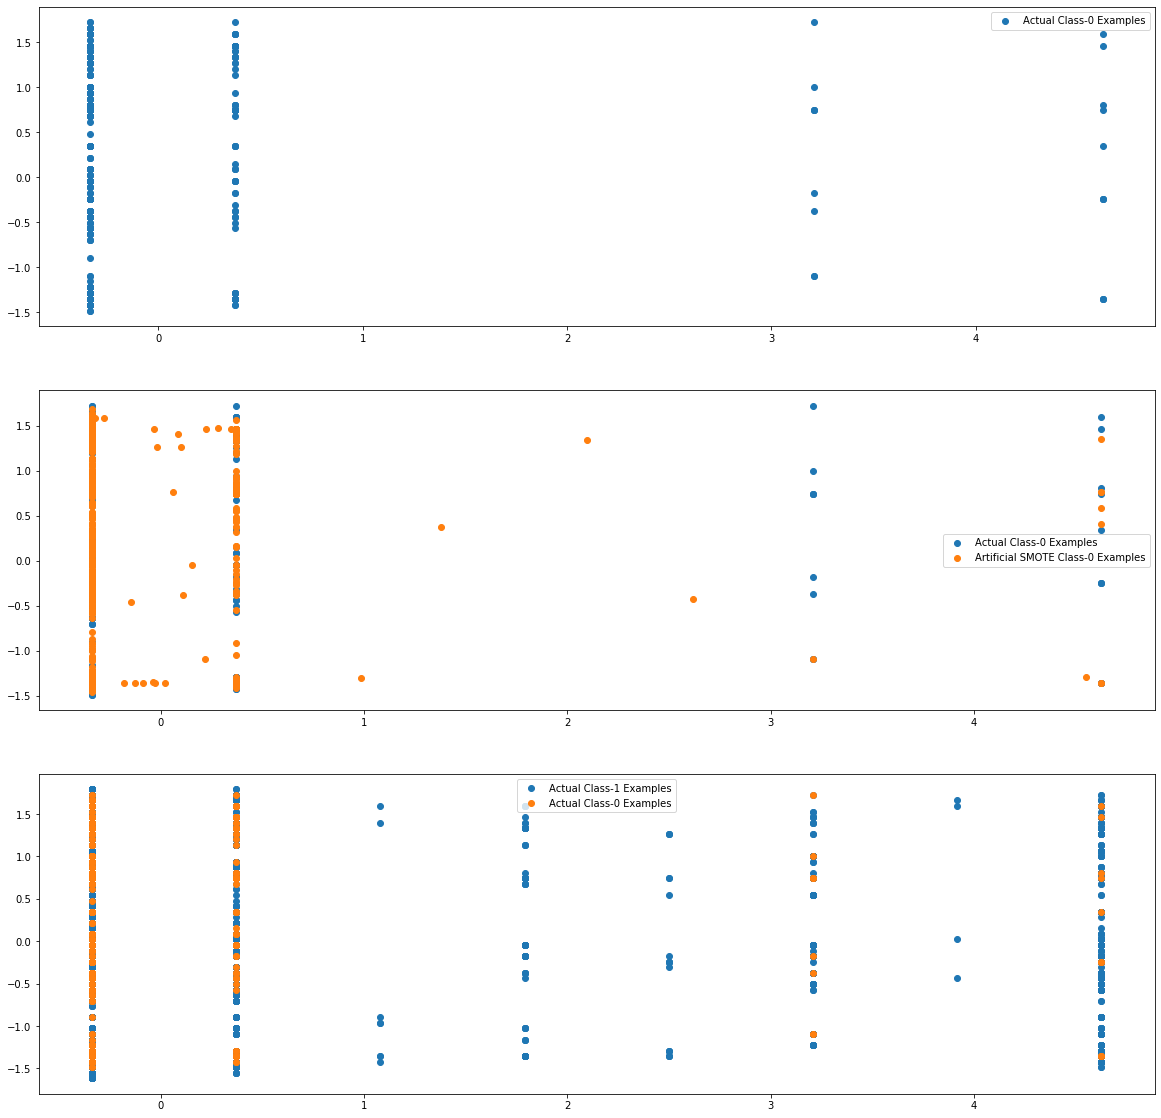

In [80]:
# Visualising the distribution of actual and synthetic datapoints

X_train_smote_0 = X_train_sm[X_train.shape[0]:] # Synthetic data points are appended after the original datapoints in the dataframe.
                                                # Hence X_train.shape[0] - original data points and ater this length all are synthetic

    
# Creating different dataframe for class 0 and 1 separately

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)] 
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()


#Scatter plot to show orignal class-0 data points (two columns of the same dataframe are taken for scatter plot)
plt.subplot(3, 1, 1)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples') 
plt.legend()

#Scatter plot for original data vs synthetic data 
plt.subplot(3, 1, 2)
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.scatter(X_train_smote_0[:X_train_0.shape[0], 0], X_train_smote_0[:X_train_0.shape[0], 1],
            label='Artificial SMOTE Class-0 Examples')  # X_train_0.shape[0] = 804 data points 
                                                        # X_train_smote_0.shape[0] = 17148 data points
                                                        # X_train_smote_0[:X_train_0.shape[0], 0] - so that only 804 data points will be considered for the scatterplot
        
plt.legend()


# Scatter plot to show distribution of original class-0 and class-1 data points
plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label='Actual Class-0 Examples')
plt.legend()

In [81]:
X_train_sm = pd.DataFrame(X_train_sm,columns = colx) #colx = columns of X_train
X_train_sm.shape #after SMOTE

(28718, 18)

In [82]:
X_train.shape #original

(15005, 18)

In [83]:
np.bincount(y_train_sm) #after SMOTE

array([14359, 14359], dtype=int64)

In [84]:
np.bincount(y_train) #original

array([  646, 14359], dtype=int64)

In [85]:
# Hyperparameters Tunning
#Logistic regression

param_log = {'penalty':['l1','l2'],'C':[0.1,.2,.3,.4,.5]}

log = LogisticRegression(class_weight ='balanced',random_state=5)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 90)
grid_log = GridSearchCV(estimator = log, param_grid = param_log, 
                          cv = folds, n_jobs = -1,verbose = 1, scoring = 'roc_auc',random_state =100)

grid_log.fit(X_train_sm,y_train_sm)

grid_log.best_params_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ghost\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-85-2a4fed9bef08>", line 10, in <module>
    cv = folds, n_jobs = -1,verbose = 1, scoring = 'roc_auc',random_state =100)
TypeError: __init__() got an unexpected keyword argument 'random_state'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ghost\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ghost\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_li

TypeError: __init__() got an unexpected keyword argument 'random_state'

In [86]:
#building model on best params

logistic = LogisticRegression(class_weight ='balanced',random_state=5,C = 0.5, penalty='l2')

logistic.fit(X_train_sm,y_train_sm)

#prediction
pred_log_sm_train = logistic.predict_proba(X_train_sm)[:,1]
pred_log_sm_test = logistic.predict_proba(X_test)[:,1]

y_pred = logistic.predict(X_test)

# Score

print ( 'Train auc score : ', roc_auc_score(y_train_sm,pred_log_sm_train))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_log_sm_test))
print(classification_report(y_test,y_pred))

log_sm_auc_test_cv = roc_auc_score(y_test, pred_log_sm_test)
precision_log_sm_cv = precision_score(y_test,y_pred)
recall_log_sm_cv = recall_score(y_test,y_pred)
f1_log_sm_cv = f1_score(y_test,y_pred)

Train auc score :  0.9383951463472503
Test auc score :  0.929703485767559
              precision    recall  f1-score   support

           0       0.25      0.84      0.38       161
           1       0.99      0.88      0.94      3591

    accuracy                           0.88      3752
   macro avg       0.62      0.86      0.66      3752
weighted avg       0.96      0.88      0.91      3752



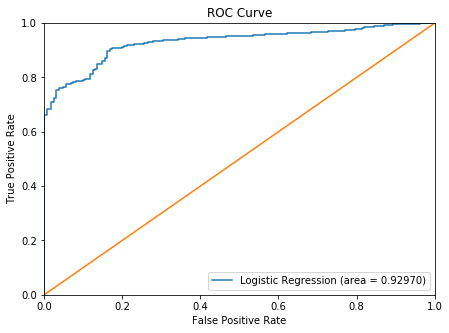

In [87]:
# plotting ROC curve on test data
fpr, tpr, thresholds = roc_curve(y_test, pred_log_sm_test)
plt.figure(figsize =(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.5f)' % log_sm_auc_test_cv)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [88]:
# RandomForestClassifier
# Hyperparameter tuning for random forest

param_rf = {
    'max_depth': [8,10],
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split':range(50, 200, 50),
    'n_estimators': [100,150,200], 
    'max_features': [5, 10]
    
}

rf = RandomForestClassifier(n_jobs=-1,class_weight ='balanced',random_state=105)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 90)

grid_rf = RandomizedSearchCV(estimator = rf, param_distributions = param_rf, 
                          cv = folds, n_jobs = -1,verbose = 1,scoring = 'roc_auc',random_state =100)


# Fitting
grid_rf.fit(X_train_sm, y_train_sm)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=90, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples...
                     

In [89]:
#best params

grid_rf.best_params_

{'n_estimators': 150,
 'min_samples_split': 50,
 'min_samples_leaf': 50,
 'max_features': 10,
 'max_depth': 10}

In [90]:
#using best params

forest_cv = RandomForestClassifier(n_estimators=150,
                                   min_samples_split=50, min_samples_leaf=50,
                                   max_features=10,max_depth=10,
                                   n_jobs=-1,class_weight ='balanced',random_state=105)

forest_cv.fit(X_train_sm, y_train_sm)


#prediction

pred_rf_train_cv= forest_cv.predict_proba(X_train_sm)[:,1]
pred_rf_test_cv = forest_cv.predict_proba(X_test)[:,1]

y_pred = forest_cv.predict(X_test)

#score
print ( 'Train auc score : ', roc_auc_score(y_train_sm,pred_rf_train_cv))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_rf_test_cv))
print(classification_report(y_test,y_pred))

forest_sm_auc_test_cv = roc_auc_score(y_test,pred_rf_test_cv)
precision_rf_sm_cv = precision_score(y_test,y_pred)
recall_rf_sm_cv = recall_score(y_test,y_pred)
f1_rf_sm_cv = f1_score(y_test,y_pred)


Train auc score :  0.9998328458010615
Test auc score :  0.9978880949786474
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       161
           1       1.00      0.99      0.99      3591

    accuracy                           0.99      3752
   macro avg       0.89      0.97      0.93      3752
weighted avg       0.99      0.99      0.99      3752



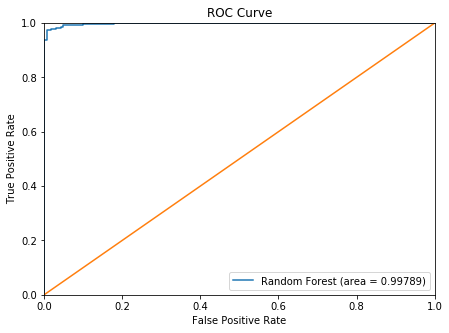

In [91]:
# plotting ROC curve on test data 
fpr, tpr, thresholds = roc_curve(y_test, pred_rf_test_cv)
plt.figure(figsize =(7,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.5f)' % forest_sm_auc_test_cv )
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [92]:
#XGBClassifier
# Hyperparameter tuning 

param_xgb = {
    'max_depth': [4,6,8],
    'learning_rate': [0.1,0.3,0.5,0.75],
    'n_estimators': [100,150,200],
    'subsample':[0.3,0.50,.75]
    
}

xgb= XGBClassifier(booster='gbtree',
       n_jobs=-1, objective='binary:logistic', random_state=20,
       reg_alpha=1, reg_lambda=0)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 90)
# Instantiate 
grid_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = param_xgb, 
                          cv = folds, n_jobs = -1,verbose = 1,scoring = 'roc_auc',random_state =100)

grid_xgb.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=90, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='bin...
                                           reg_lambda=0, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecat

In [93]:
#best parameters

grid_xgb.best_params_

{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.75}

In [ ]:
xgb= XGBClassifier(booster='gbtree',subsample=0.75,
                   n_estimators = 150,
                   max_depth = 4,
                   learning_rate=0.3,
                   n_jobs=-1,objective='binary:logistic', random_state=20,
                   reg_alpha=1, reg_lambda=0)   

xgb.fit(X_train_sm, y_train_sm)
#prediction 

pred_xgb_train_cv= xgb.predict_proba(X_train_sm)[:,1]
pred_xgb_test_cv = xgb.predict_proba(X_test)[:,1]

y_pred = xgb.predict(X_test)

#score
print ( 'Train auc score : ', roc_auc_score(y_train_sm,pred_xgb_train_cv))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_xgb_test_cv))
print(classification_report(y_test,y_pred))

xgb_sm_auc_test_cv = roc_auc_score(y_test,pred_xgb_test_cv)
precision_xgb_sm_cv = precision_score(y_test,y_pred)
recall_xgb_sm_cv = recall_score(y_test,y_pred)
f1_xgb_sm_cv = f1_score(y_test,y_pred)


In [ ]:
# plotting ROC curve on test data 
fpr, tpr, thresholds = roc_curve(y_test, pred_xgb_test_cv )
plt.figure(figsize =(7,5))
plt.plot(fpr, tpr, label='XGBClassifier (area = %0.5f)' % xgb_sm_auc_test_cv)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# scores 

auc_score_all =[log_sm_auc_test_cv,forest_sm_auc_test_cv,xgb_sm_auc_test_cv]
recall_all = [recall_log_sm_cv,recall_rf_sm_cv,recall_xgb_sm_cv]
precision_all = [precision_log_sm_cv,precision_rf_sm_cv,precision_xgb_sm_cv]
f1_all =[f1_log_sm_cv,f1_rf_sm_cv,f1_xgb_sm_cv]

sm_cv = pd.DataFrame({'auc_score':auc_score_all,'recall':recall_all,'precision':precision_all,'f1_score':f1_all},index =['Logistic Regression','Random Forest','XGBoost'])
sm_cv

In [ ]:
us_cv

In [ ]:
ada_cv

### Observations:

#### Score of XGBClassifier is better than that of other two models. Hence XGBClassifier is selected as the final model.

### 9. Prediction on test data:

In [ ]:

hack= xgb_ada.predict(test_df)

result = pd.DataFrame({'INCIDENT_ID':test_df_id,'MULTIPLE_OFFENSE':hack})
result.head()

In [ ]:
#Important features
xgb_ada.feature_importances_


In [ ]:
# Important features

plot_importance(xgb,importance_type='gain')
plt.show()

### 10. Submission:

In [ ]:
result.to_csv (r'C:\Users\ghost\Downloads\kaggle\my uploads\subx.csv', index = None, header=True)
pd.read_csv('subx.csv').head()

In [ ]:
#saving the final model as pickle file

import pickle

#open a file where you want to store the model
file = open('xgb.pkl','wb')

pickle.dump(xgb,file) #dumping / saving the model inside file xgb.pkl

In [ ]:
#loading / reading the model from the pickle file and predicting

model = pickle.load(open('xgb.pkl','rb'))
hack = model.predict(test_df)
resm = pd.DataFrame({'INCIDENT_ID':test_df_id,'MULTIPLE_OFFENSE':hack})
resm.head()